File(s) generated: data/histogram-2.pkl, data/histogram-3.pkl, data/predetermined-5.pkl

Confirm independence of innermost convergence on quantities that are not m0 * dist_to_e, (h-d1)/(h-d0), and (h-d)/radwidth.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [2]:
def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

In [ ]:
file1 = "data/histogram-2.pkl"
m0_e_dists = [10, 1, 0.2]
right_ratios = [0.1, 0.9, 2]
hmdrs = [1, 15, 30]

def populate_h_d_a_m0(m0_e_dist, right_ratio, hmdr):
  while True:
    radwidth0 = random.uniform(low = 0, high = 10)
    hmd0 = hmdr * radwidth0
    hmd1 = right_ratio * hmd0

    radwidth1 = hmd1/random.uniform(low = 1, high = 10)
    m0 = random.uniform(low = 0, high = min([m0_e_dist/radwidth1, 60/max(hmd0, hmd1)]))
    radwidth2 = m0_e_dist/m0 - radwidth1
    hmd2 = random.uniform(low = 1, high = 10) * radwidth2
    hmds = [hmd0, hmd1, hmd2]
    if max(hmds) < 60/m0:
      break
  
  h = random.uniform(low = max(hmds), high = 60/m0)

  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(3):
    assert d[i] > 0
    assert radwidths[i] > 0
  return h, d, a, m0

# all_prob_sets = []
# for m0_e_dist in m0_e_dists:
#   for right_ratio in right_ratios:
#     for hmdr in hmdrs:
#       prob_set = []
#       for i in range(50):
#         h, d, a, m0 = populate_h_d_a_m0(m0_e_dist, right_ratio, hmdr)
#         prob_set.append(solve_and_store(h, d, a, [1, 0, 0], [200, 200, 200, 200], m0, 1023, 150))
#       all_prob_sets.append(prob_set)
#       update_data_file(all_prob_sets, file1)

In [ ]:
file2 = "data/histogram-3.pkl"
m0_e_dists = [10, 1, 0.2]
right_ratios = [0.1, 0.9, 2]
hmdrs = [30]
all_m0hmds = [[2, 10, 29], [0.5, 2, 4], [0.1, 0.4, 0.9]]

def populate_h_d_a_m0(m0_e_dist, right_ratio, hmdr, m0hmd):
  while True:
    radwidth0 = random.uniform(low = 0, high = 10)
    hmd0 = hmdr * radwidth0
    hmd1 = right_ratio * hmd0
    m0 = m0hmd/hmd0
    rad1_rad2 = m0_e_dist/m0

    radwidth1 = hmd1/random.uniform(low = max(1, hmd1/rad1_rad2), high = 10)
    radwidth2 = rad1_rad2 - radwidth1
    hmd2 = random.uniform(low = 1, high = 10) * radwidth2
    hmds = [hmd0, hmd1, hmd2]
    if max(hmds) < 60/m0:
      break
  
  h = random.uniform(low = max(hmds), high = 60/m0)

  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(3):
    assert d[i] > 0
    assert radwidths[i] > 0
  return h, d, a, m0

# all_prob_sets = []
# for idx, m0_e_dist in enumerate(m0_e_dists):
#   m0hmds = all_m0hmds[idx]
#   for right_ratio in right_ratios:
#     for hmdr in hmdrs:
#       for m0hmd in m0hmds:
#         print(right_ratio, m0_e_dist, m0hmd)
#         prob_set = []
#         for i in range(50):
#           h, d, a, m0 = populate_h_d_a_m0(m0_e_dist, right_ratio, hmdr, m0hmd)
#           prob_set.append(solve_and_store(h, d, a, [1, 0, 0], [200, 200, 200, 200], m0, 1023, 150))
#         all_prob_sets.append(prob_set)
#         update_data_file(all_prob_sets, file2)

In [ ]:
# file3 = "data/predetermined-5.pkl"
# m0_e_dists = [10, 1, 0.2] #TODO Fix this
# right_ratios = [0.1, 0.9, 2]
# hmdrs = [30]
# all_m0hmds = [[2, 10, 29], [0.5, 2, 4], [0.1, 0.4, 0.9]]

# def populate_h_d_a_m0(m0_e_dist, right_ratio, hmdr, m0hmd, hmd1_over_hmd2):
#   while True:
#     radwidth0 = random.uniform(low = 0, high = 10)
#     hmd0 = hmdr * radwidth0
#     hmd1 = right_ratio * hmd0
#     hmd2 = hmd1/hmd1_over_hmd2
#     m0 = m0hmd/hmd0
#     rad1_rad2 = m0_e_dist/m0

#     radwidth1 = hmd1/random.uniform(low = max(1, hmd1/rad1_rad2), high = 10)
#     radwidth2 = rad1_rad2 - radwidth1
#     hmds = [hmd0, hmd1, hmd2]
#     if (max(hmds) < 60/m0) and (hmd2/radwidth2) < 10 and (hmd2/radwidth2) > 1:
#       break
  
#   h = random.uniform(low = max(hmds), high = 60/m0)

#   radwidths = [radwidth0, radwidth1, radwidth2]
#   d = [h - hmds[i] for i in range(3)]
#   a = [sum(radwidths[:i + 1]) for i in range(3)]
#   for i in range(3):
#     assert d[i] > 0
#     assert radwidths[i] > 0
#   return h, d, a, m0

# all_prob_sets = []
# for idx, m0_e_dist in enumerate(m0_e_dists):
#   m0hmds = all_m0hmds[idx]
#   for right_ratio in right_ratios:
#     for hmdr in hmdrs:
#       for m0hmd in m0hmds:
#         print(right_ratio, m0_e_dist, m0hmd)
#         prob_set = []
#         for i in range(50):
#           h, d, a, m0 = populate_h_d_a_m0(m0_e_dist, right_ratio, hmdr, m0hmd)
#           prob_set.append(solve_and_store(h, d, a, [1, 0, 0], [200, 200, 200, 200], m0, 1023, 150))
#         all_prob_sets.append(prob_set)
#         update_data_file(all_prob_sets, file2)

In [12]:
all_hist_data = open_pkl_file(file1)
for hist_data in all_hist_data:
  generate_convergence_data(hist_data, [0.01, 0.005])
  generate_log_data(hist_data)

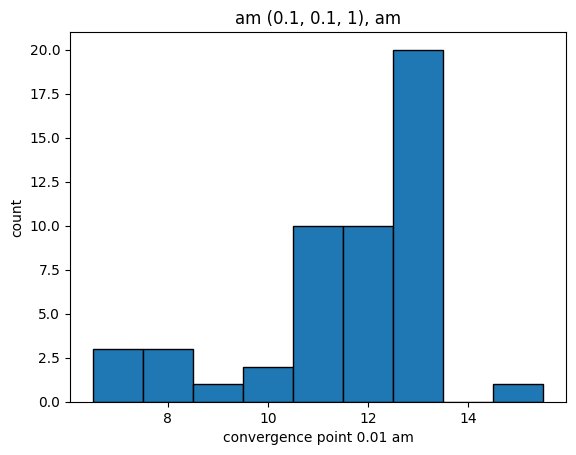

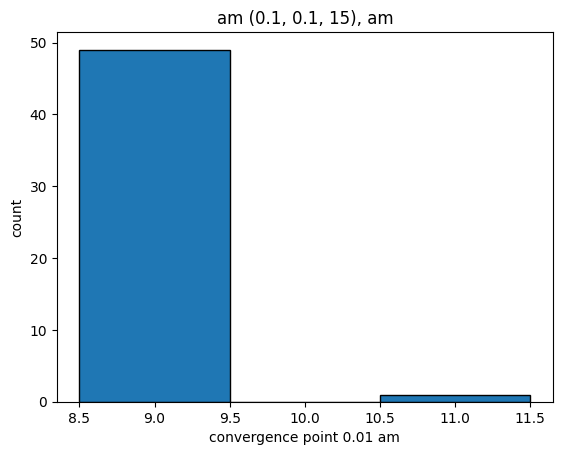

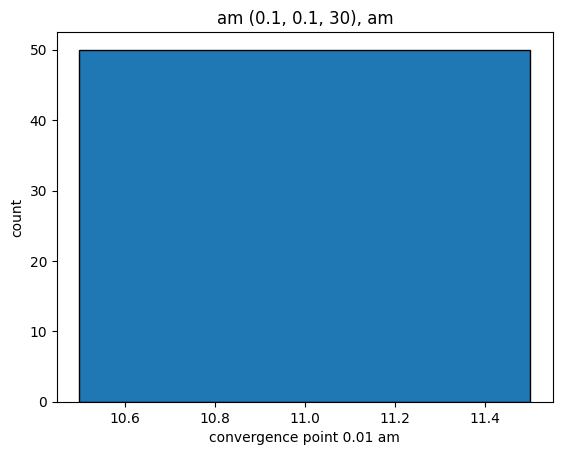

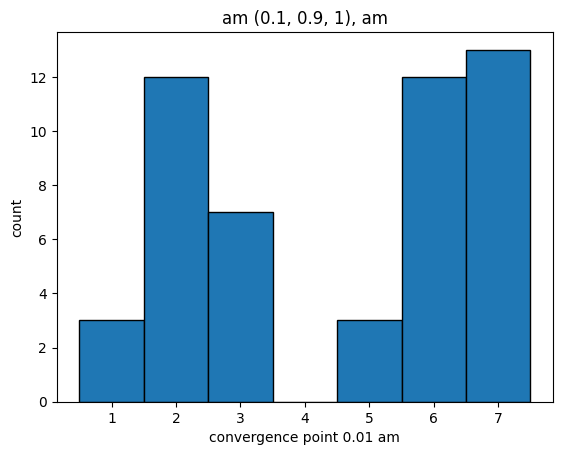

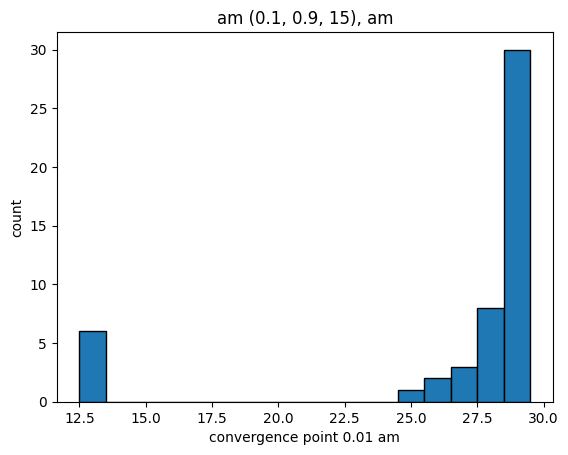

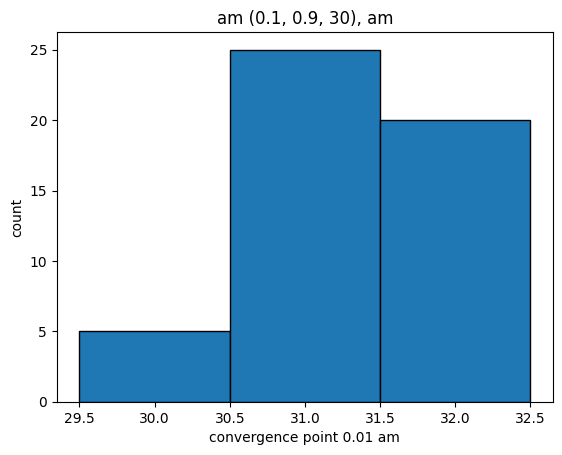

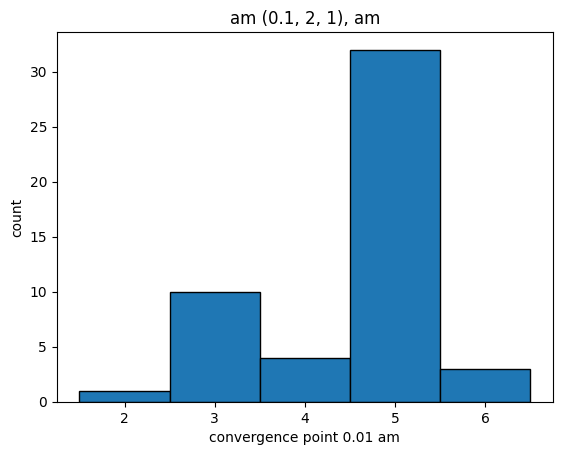

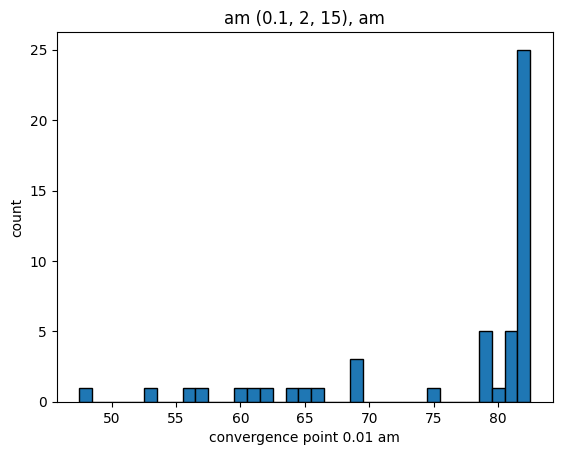

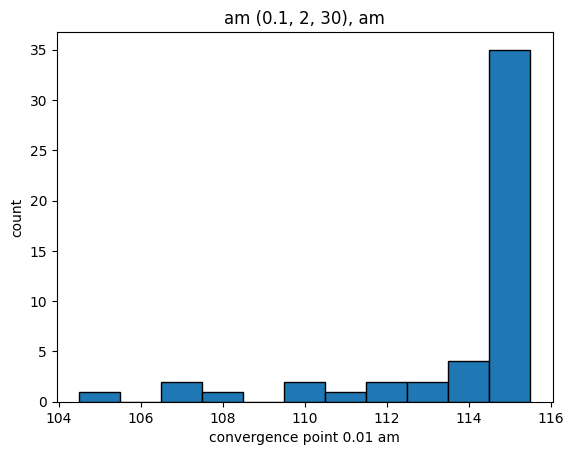

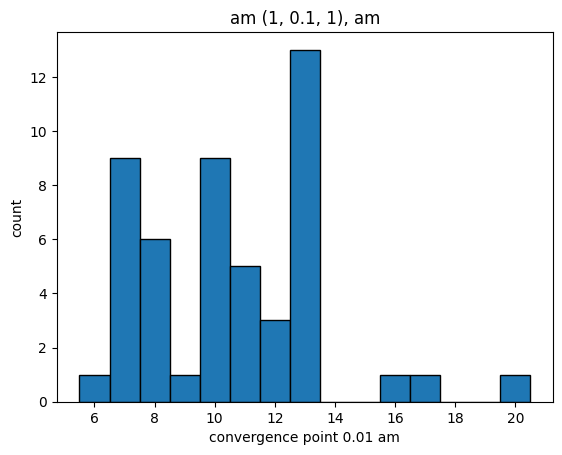

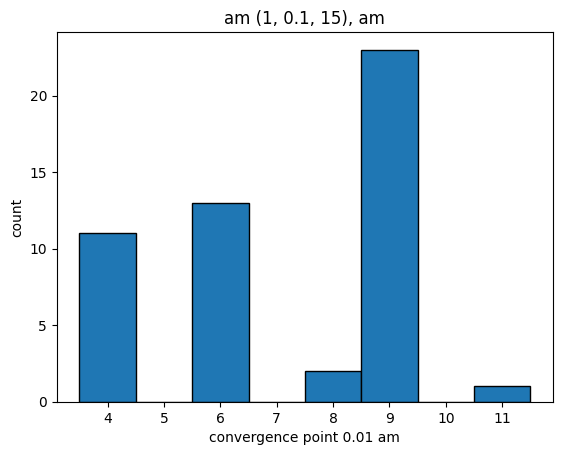

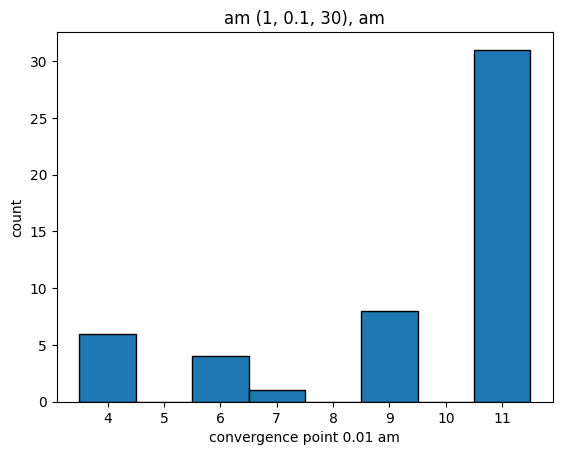

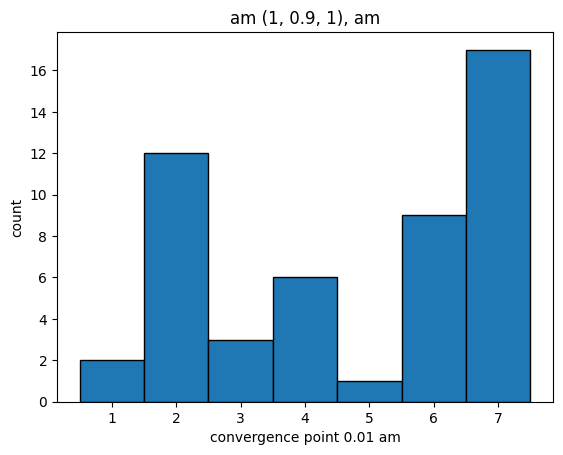

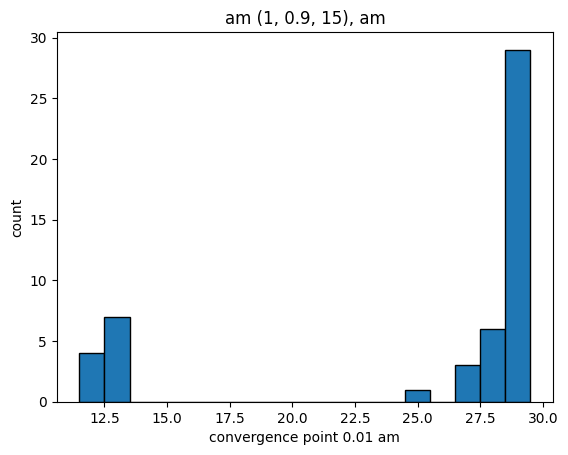

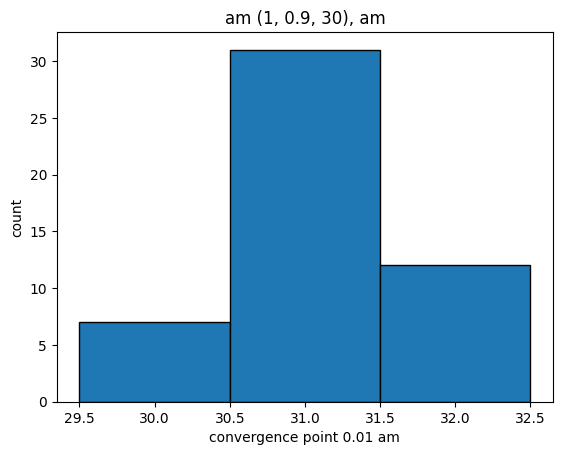

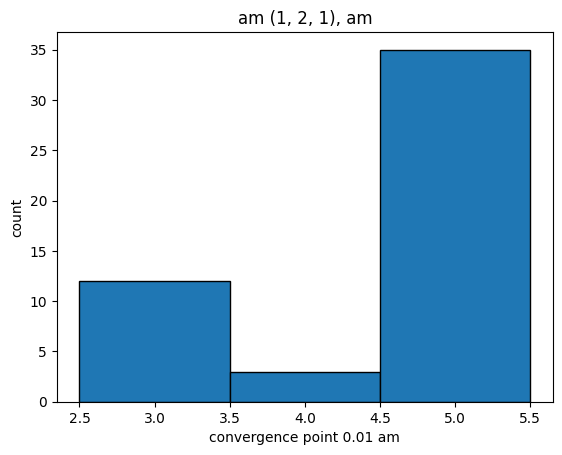

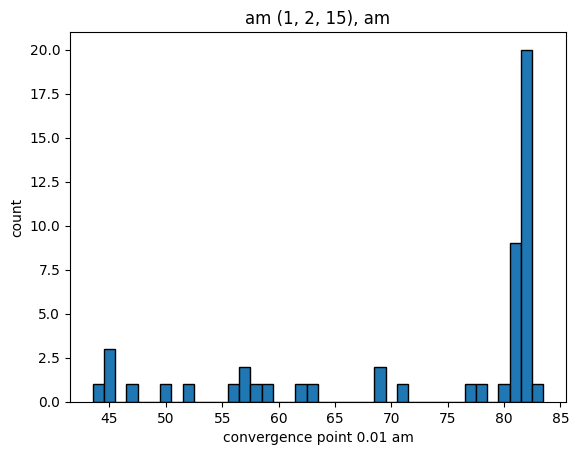

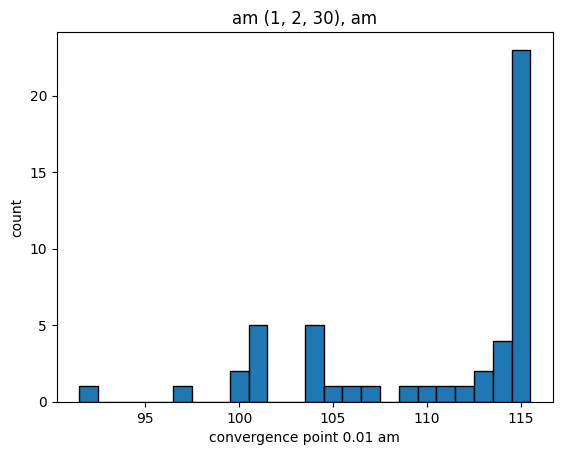

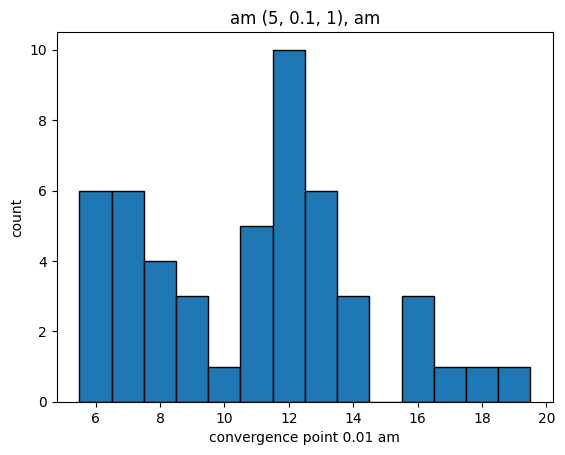

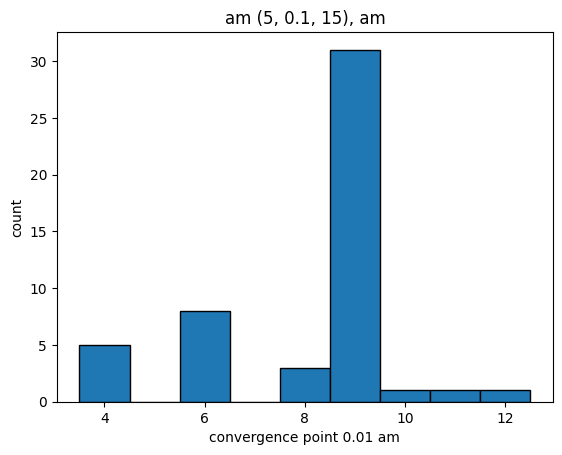

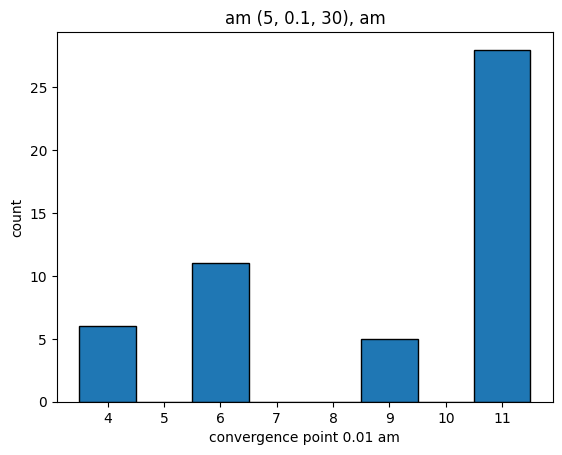

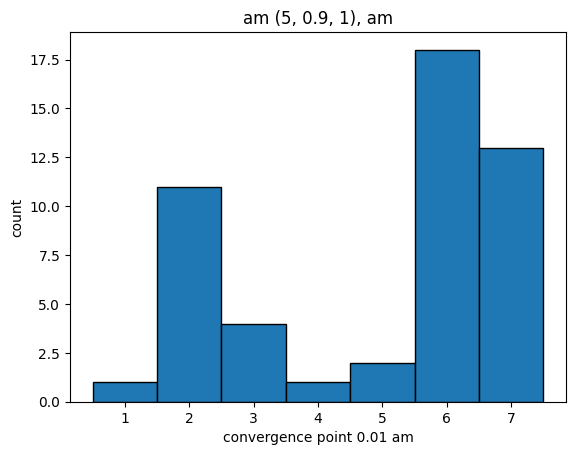

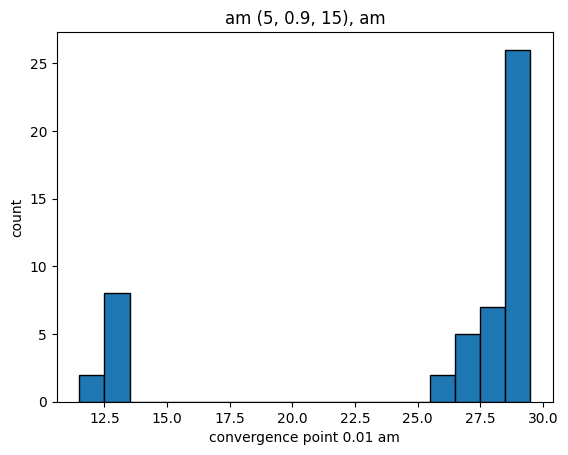

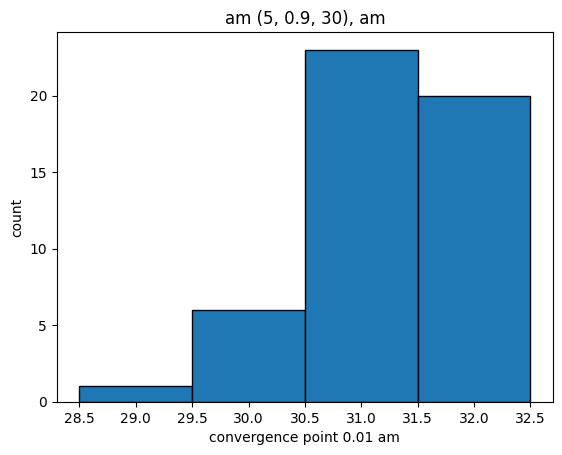

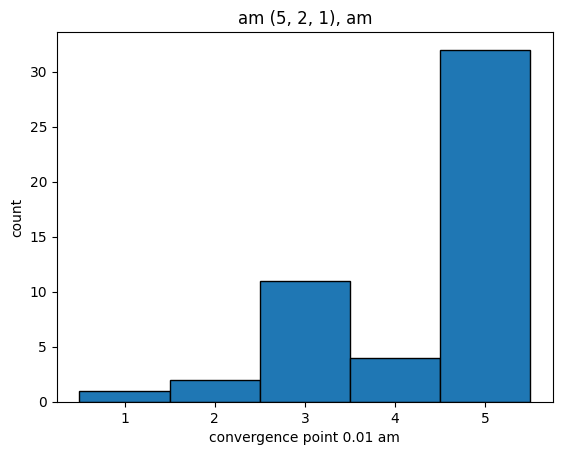

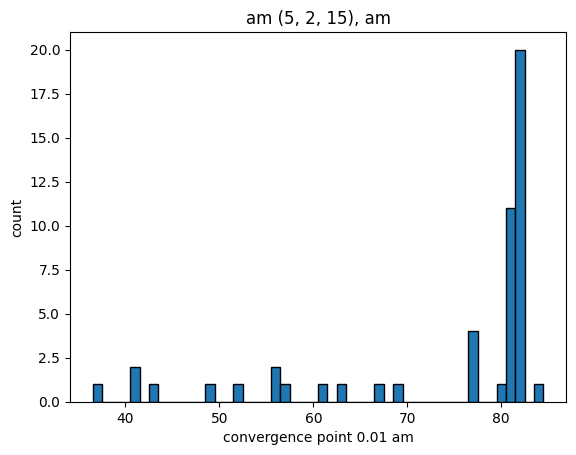

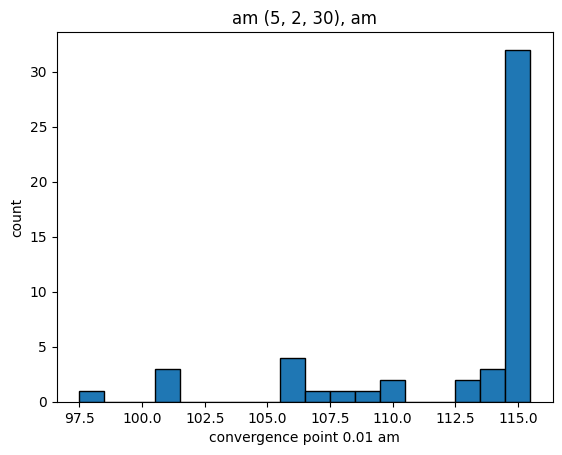

In [6]:
hydro = "am"
am_wide_variation_cases = []
count = 0

for m0_e_dist in m0_e_dists:
  for right_ratio in right_ratios:
    for hmdr in hmdrs:
      title = f"({1/m0_e_dist:.2g}, {right_ratio:.2g}, {hmdr:.2g}), " + hydro
      vals = histogram(all_hist_data[count], hydro, 0.01, ylab = "count", title = title)
      if max(vals) - min(vals) > 7:
        am_wide_variation_cases.append(count)
      count += 1

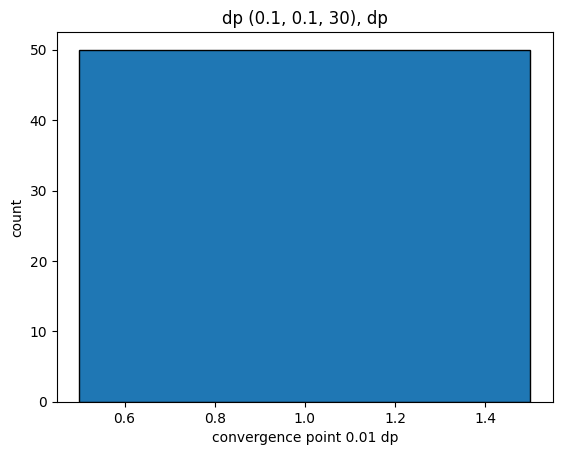

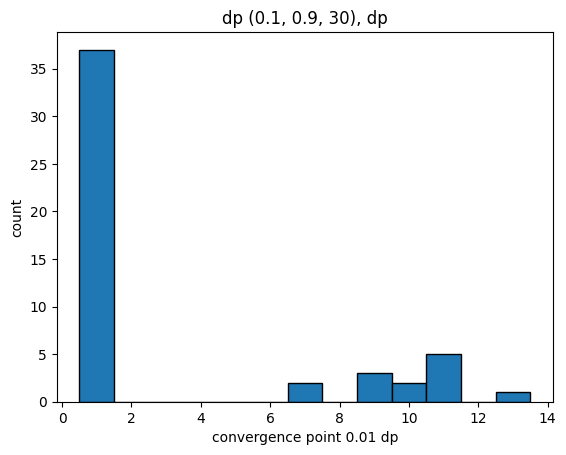

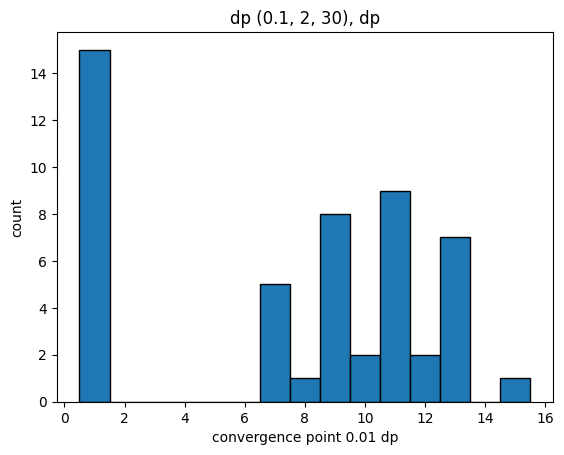

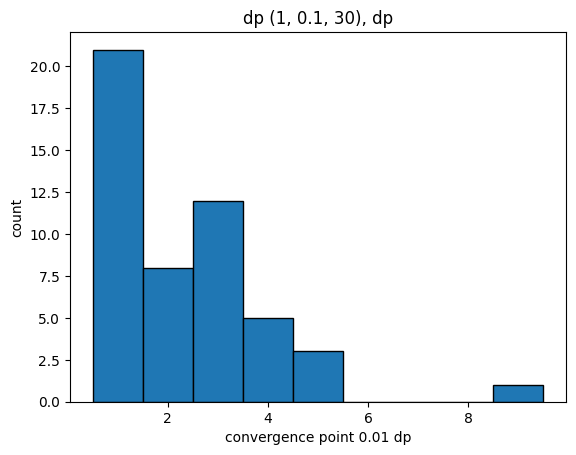

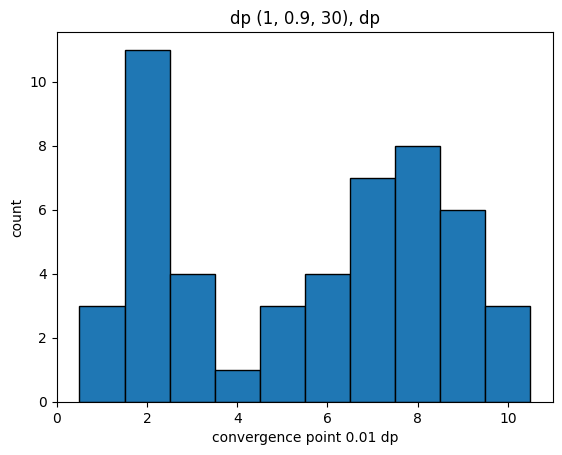

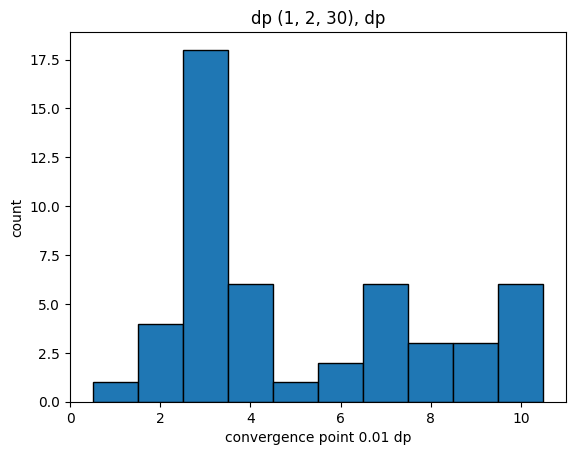

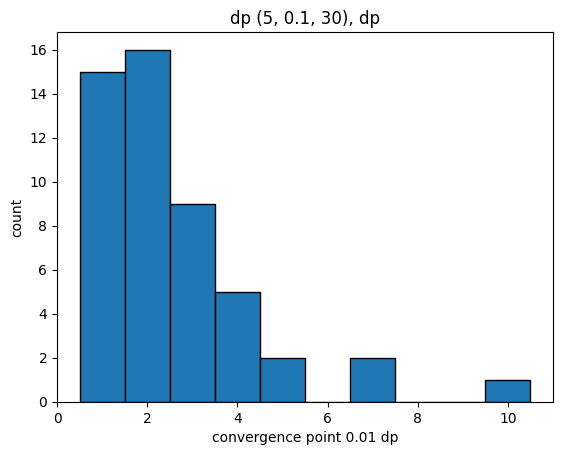

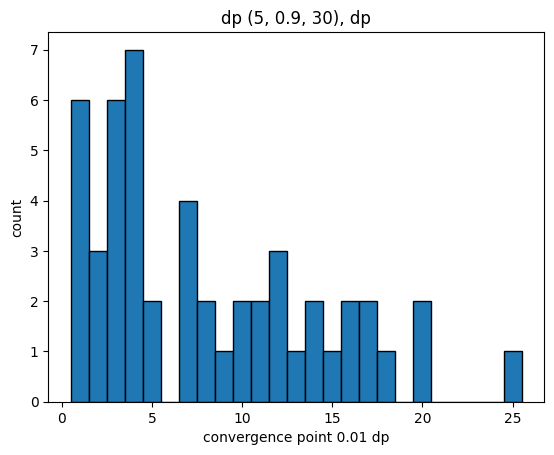

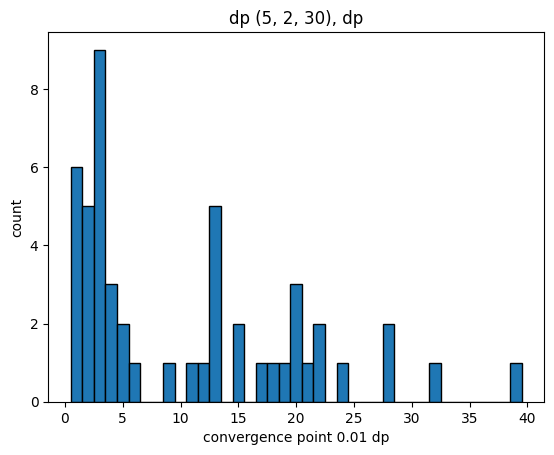

In [87]:
hydro = "dp"
dp_wide_variation_cases = []
count = 0

for m0_e_dist in m0_e_dists:
  for right_ratio in right_ratios:
    for hmdr in hmdrs:
      title = f"({1/m0_e_dist:.2g}, {right_ratio:.2g}, {hmdr:.2g}), " + hydro
      vals = histogram(all_hist_data[count], hydro, 0.01, ylab = "count", title = title)
      if max(vals) - min(vals) > 7:
        dp_wide_variation_cases.append(count)
      count += 1

In [16]:
suspects = all_hist_data[7]

In [8]:
def plot_varied_cases(fixed_prob_lsts, idx, hydro, f = None, xlab = "X", error = 0.01):
  subset = fixed_prob_lsts[idx].copy()
  val_func = lambda data: data[data["m0s"][0]][f"convergence point {error:.2g} " + hydro]
  subset.sort(key = val_func)
  vals = [val_func(data) for data in subset]
  filter_and_plot_shapes(subset, lambda data_dict, m0 : True, 
                        lambda data_dict, m0 : get_plasma_color(data_dict[m0][f"convergence point {error:.2g} " + hydro], min_value = min(vals), max_value=max(vals)),
                        ppr = 10, figsize_per_plot = (2, 2))
  if f is not None:
    xs = [f(data_dict, data_dict["m0s"][0]) for data_dict in subset]
    ys = [data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in subset]
    plt.scatter(xs, ys)
    plt.xlabel(xlab)
    plt.ylabel("convergence point 0.01")
    plt.title(hydro)
    plt.show()

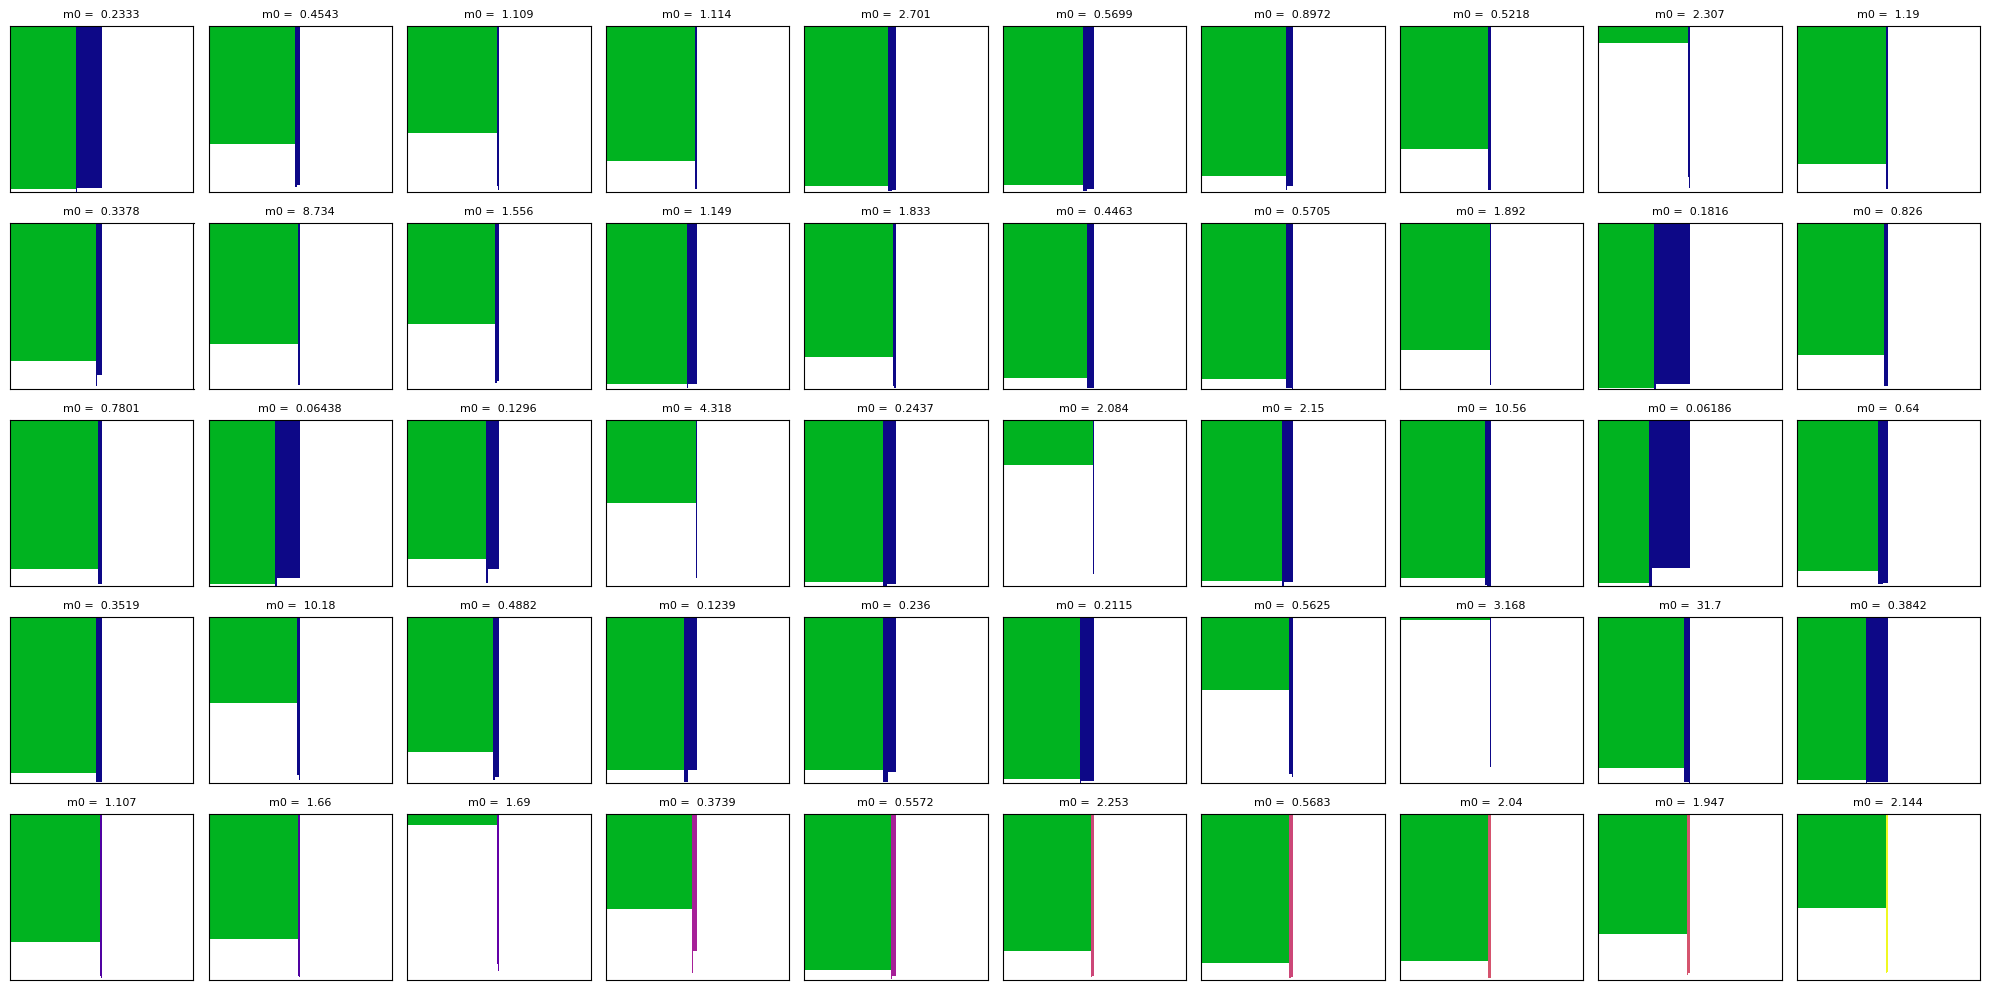

In [8]:
def test_f(config, m0):
  return (config["h"] - config["d"][1])/(config["a"][1] - config["a"][0])
plot_varied_cases(all_hist_data, 18, "dp", f = None, error = 0.005)

In [ ]:
for idx in dp_wide_variation_cases:
    _ = generate_log_data(all_hist_data[idx])

suspects = []
for config in all_hist_data[8]:
  if config[config["m0s"][0]]["convergence point 0.01 dp"] > 1:
    suspects.append(config)

In [71]:
variable_funcs = {"m0h" :  lambda config, m0 : m0 * config["h"],
                  "(h-d0)/radwidth" : lambda config, m0 : (config["h"]-config["d"][0])/config["a"][0],
                  "1/(m0 * e_dist)" : lambda data_dict, m0: 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                  "m0" : lambda data_dict, m0 : m0,
                  "m0(h-d0)" : lambda config, m0 : m0 * (config["h"]-config["d"][0]),
                  "(h-d0)" : lambda config, m0 : (config["h"]-config["d"][0]),
                  "(h-d1)/(h-d0)" : lambda config, m0 : (config["h"]-config["d"][1])/(config["h"]-config["d"][0])}

In [72]:
variable_vals = [variable_funcs["m0(h-d0)"](suspect, m0) for suspect in suspects for m0 in suspect["m0s"]]
print(min(variable_vals), max(variable_vals))
idx = variable_vals.index(max(variable_vals))
for key in ["h", "d", "a", "m0s"]:
  print(suspects[idx][key])
for lab in ["(h-d0)/radwidth", "1/(m0 * e_dist)", "(h-d1)/(h-d0)"]:
  print(suspects[idx], suspects[idx]["m0s"][0])

2.169996231799266 27.502610205480444
294.5620957260202
[157.7428956981355, 20.923695670250822, 146.8906159716436]
[9.121280001858977, 40.65269805229816, 58.86899449356228]
[0.20101425969363385]
{'h': 294.5620957260202, 'd': [157.7428956981355, 20.923695670250822, 146.8906159716436], 'a': [9.121280001858977, 40.65269805229816, 58.86899449356228], 'region': 0, 'm0s': [0.20101425969363385], 0.20101425969363385: {'ams': [np.float64(12456223.344094982), np.float64(5303318.264632575), np.float64(3620533.5516409), np.float64(2920395.731999587), np.float64(2551942.3136463766), np.float64(2331082.8797461125), np.float64(2187143.513212802), np.float64(2087642.5746358158), np.float64(2015756.9669654833), np.float64(1961996.5337538007), np.float64(1920652.061907836), np.float64(1888111.5261428049), np.float64(1861994.9006930867), np.float64(1840680.2967703403), np.float64(1823030.6315371129), np.float64(1808229.0489268901), np.float64(1795676.1657986522), np.float64(1784923.895471613), np.float64(

In [7]:
# Generate a dicionary of ratios.
def hmdi(data_dict, i):
  return data_dict["h"] - data_dict["d"][i]

def di(data_dict, i):
  return data_dict["d"][i]

def radwidthi(data_dict, i):
  return data_dict["a"][i] - (0 if i == 0 else data_dict["a"][i-1])

def radrange(data_dict, i, j):
  return sum([radwidthi(data_dict, k) for k in range(i+1, j + 1)])

dim1s = {"h" : lambda data_dict, m0: data_dict["h"],
        "(1/m0)" : lambda data_dict, m0: 1/m0}

for i in range(3):
  dim1s["d" + str(i)] = lambda data_dict, m0, i=i : di(data_dict, i)
  dim1s["(h-d" + str(i) + ")"] = lambda data_dict, m0, i=i: hmdi(data_dict, i)
  dim1s["radwidth" + str(i)] = lambda data_dict, m0, i=i: radwidthi(data_dict, i)
  for j in range(i + 1, 3):
    dim1s["(a" + str(j) + "-a" + str(i) + ")"] = lambda data_dict, m0, i=i, j=j : radrange(data_dict, i, j)

dim0s = {} # size = 14**2
for key1 in dim1s.keys():
  for key2 in dim1s.keys():
    if key1 == key2:
      pass
    else:
      dim0s[key1 + "/" + key2] = (lambda data_dict, m0, k1 = key1, k2 = key2 : dim1s[k1](data_dict, m0)/dim1s[k2](data_dict, m0))

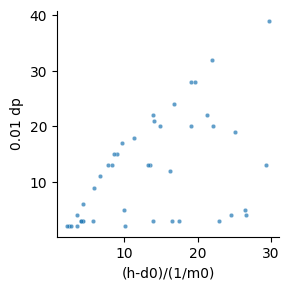

In [88]:
plot_relation_grid([config for config in all_hist_data[8] if config[config["m0s"][0]]["convergence point 0.01 dp"] > 1],
                    {"(h-d0)/(1/m0)" : lambda data_dict, m0, k = key : dim1s["(h-d0)"](data_dict, m0)/dim1s["(1/m0)"](data_dict, m0)}, y_funcs)

0.09999999999999998


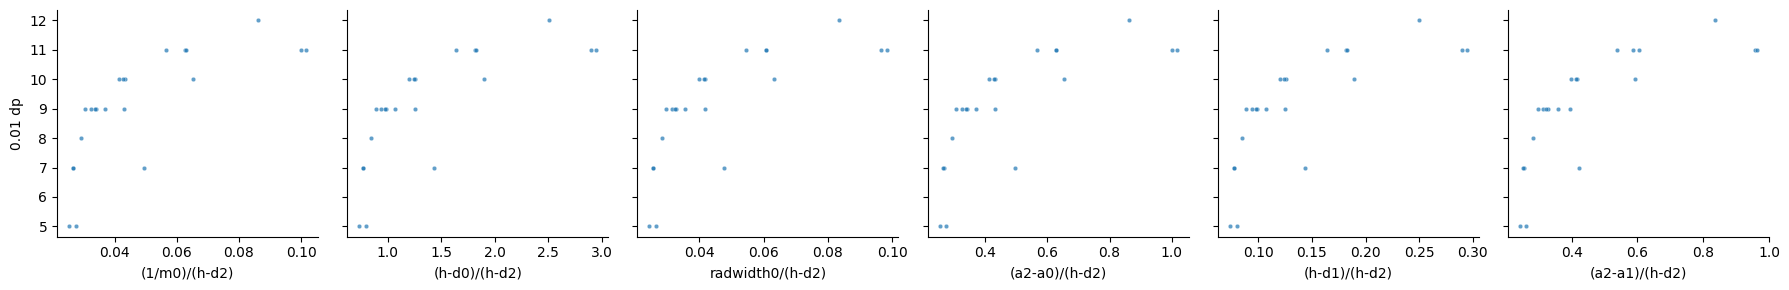

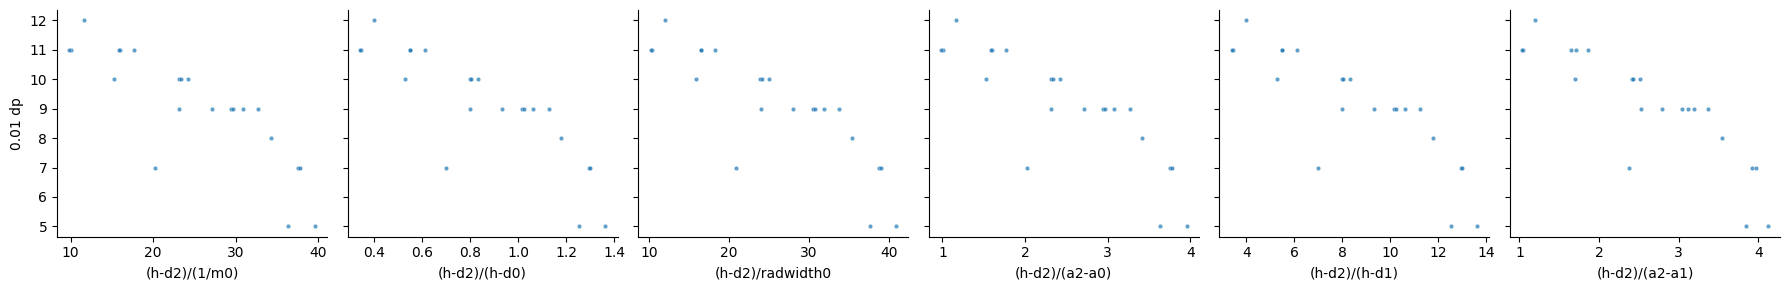

0.9


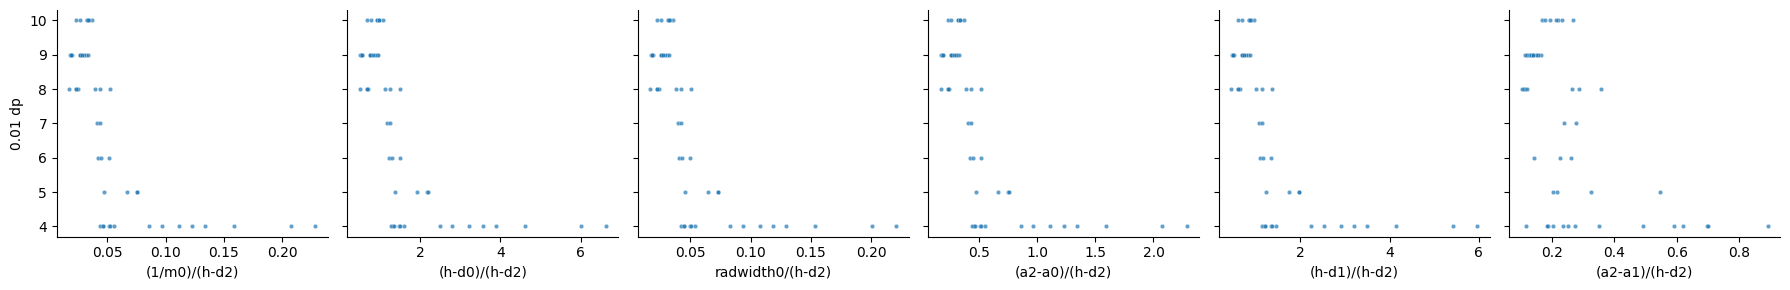

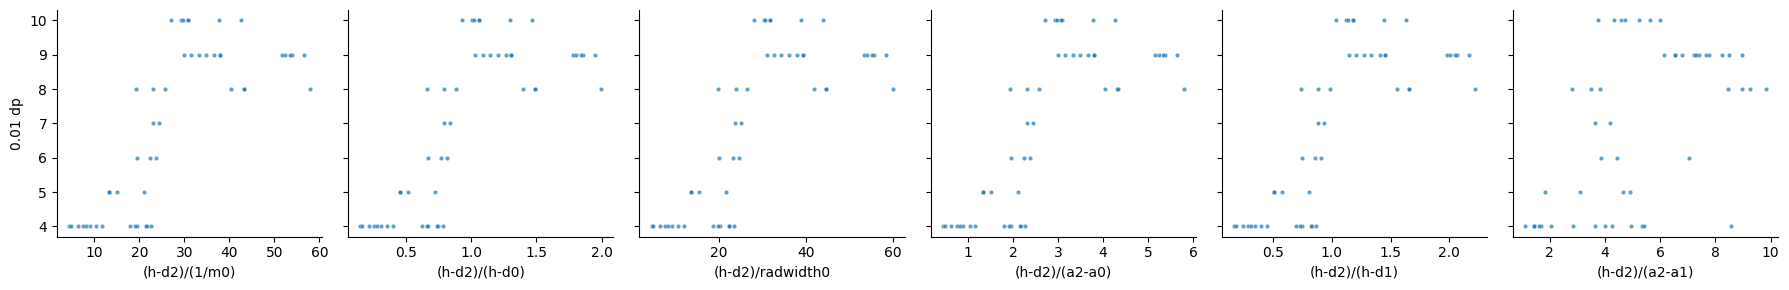

2.000000000000001


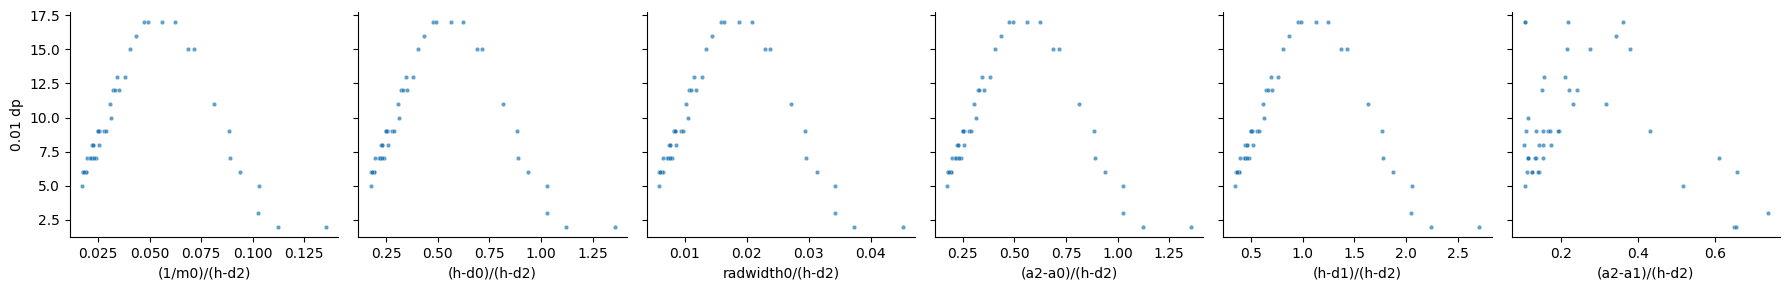

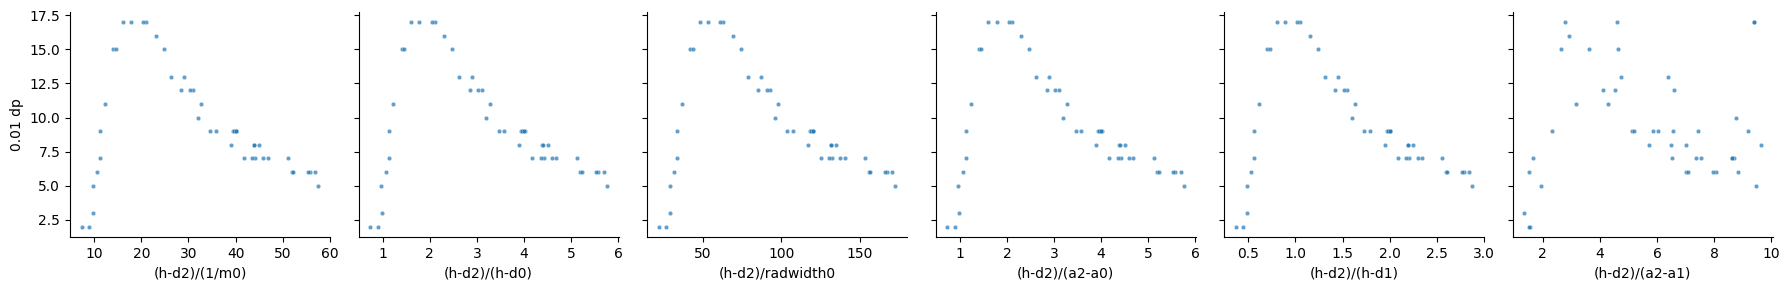

2.0


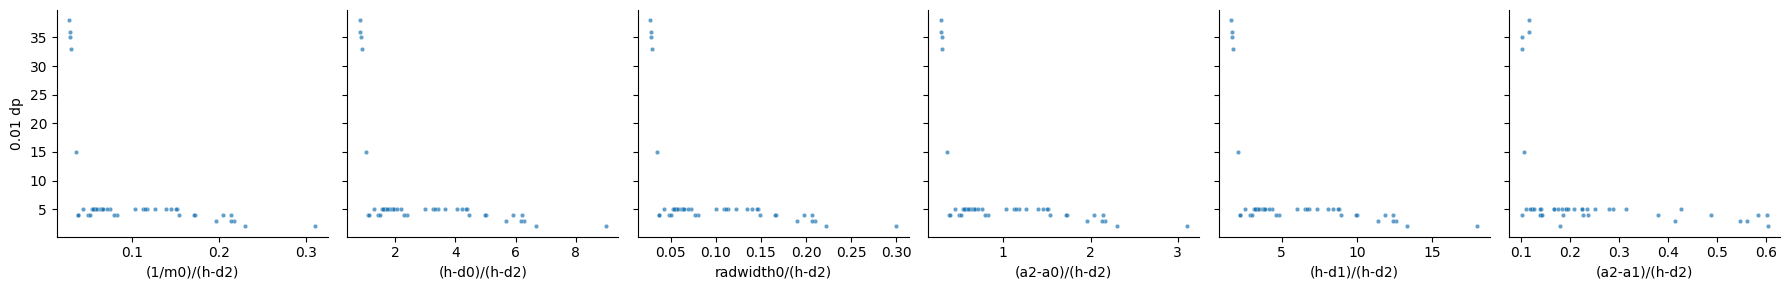

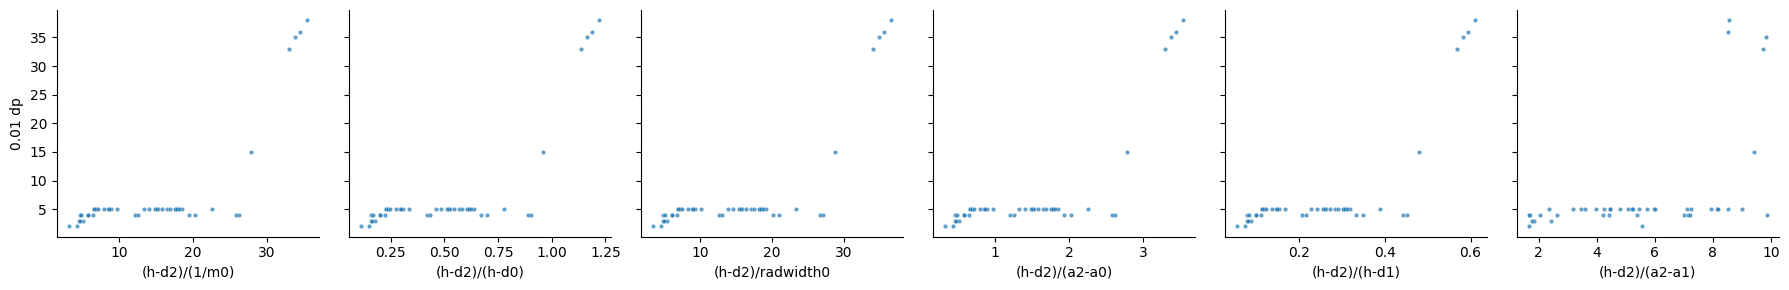

In [82]:
keys = ["(1/m0)", "(h-d0)", "radwidth0", "(a2-a0)", "(h-d1)", "(a2-a1)"]
dim0s_v2 = {} # size = 12
for key in keys:
  dim0s_v2[key + "/(h-d2)"] = (lambda data_dict, m0, k = key : dim1s[k](data_dict, m0)/dim1s["(h-d2)"](data_dict, m0))
for key in keys:
  dim0s_v2["(h-d2)/" + key] = (lambda data_dict, m0, k = key : dim1s["(h-d2)"](data_dict, m0)/dim1s[k](data_dict, m0))

for idx in dp_wide_variation_cases:
  data = [config for config in all_hist_data[idx] if config[config["m0s"][0]]["convergence point 0.01 dp"] > 1]
  print(variable_funcs["(h-d1)/(h-d0)"](data[0], data[0]["m0s"][0]))
  count = 0
  plot_fs = {}
  for func_label in dim0s_v2.keys():
    variable_vals = [dim0s_v2[func_label](data_dict, m0) for data_dict in data for m0 in data_dict["m0s"]]
    min_v, max_v = min(variable_vals), max(variable_vals)
    if abs(max_v-min_v)/max_v > 0.00001:
      plot_fs[func_label] = dim0s_v2[func_label]
      count += 1
      if count == 6:
        plot_relation_grid(data, plot_fs, y_funcs)
        count, plot_fs = 0, {}

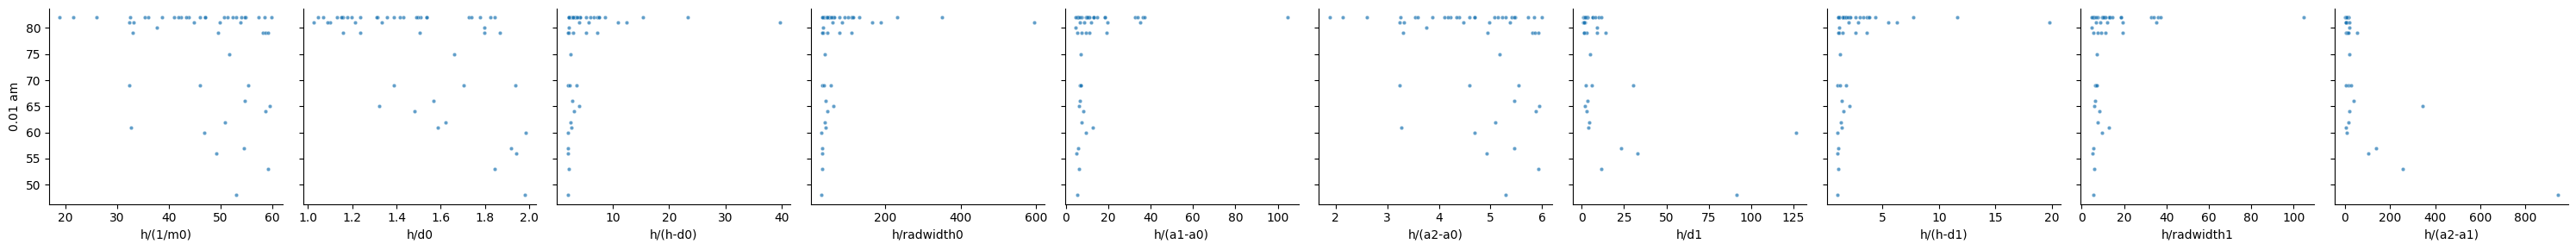

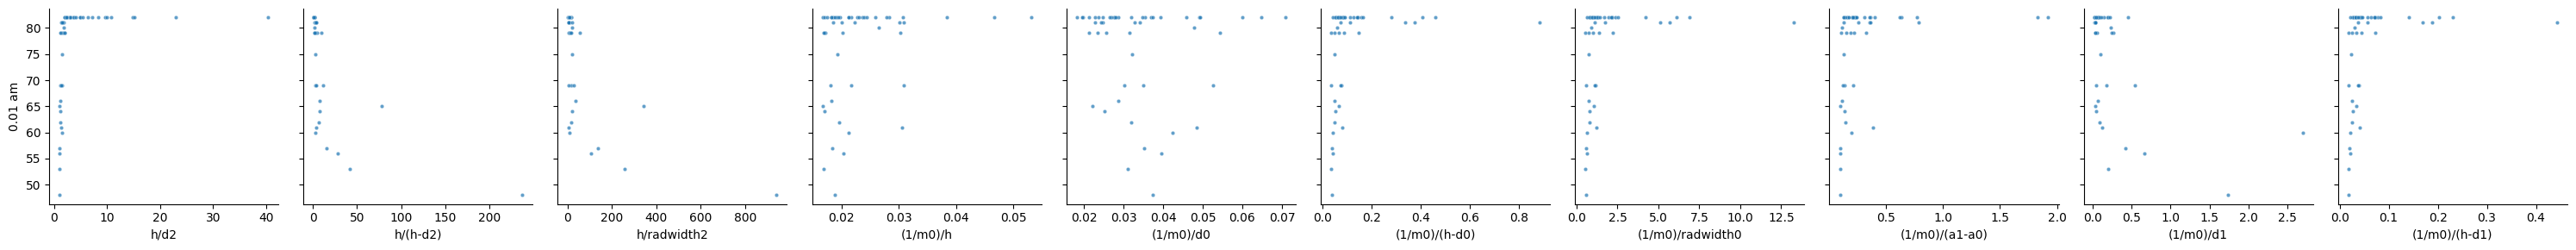

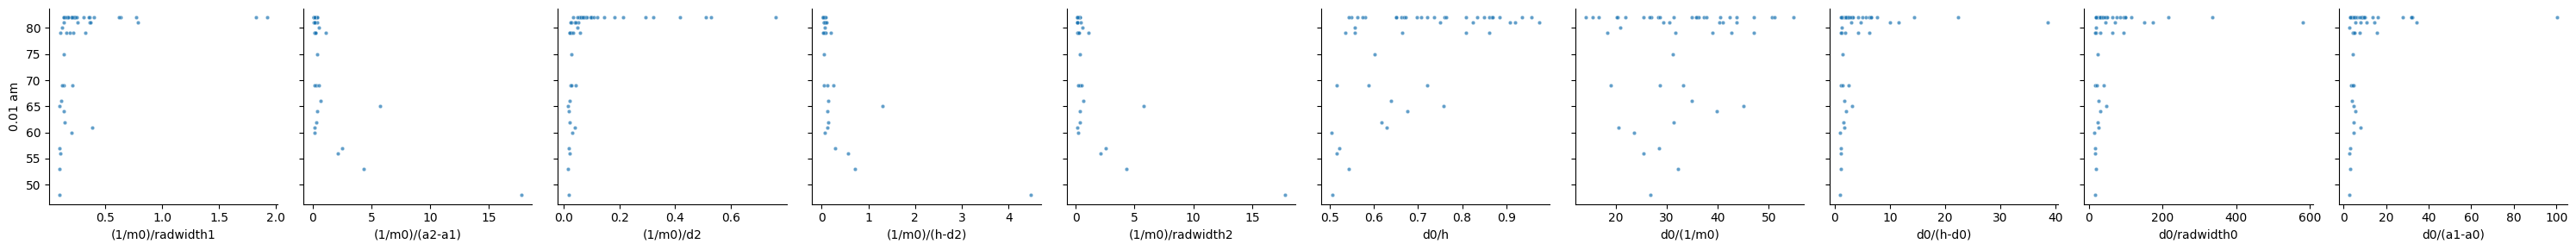

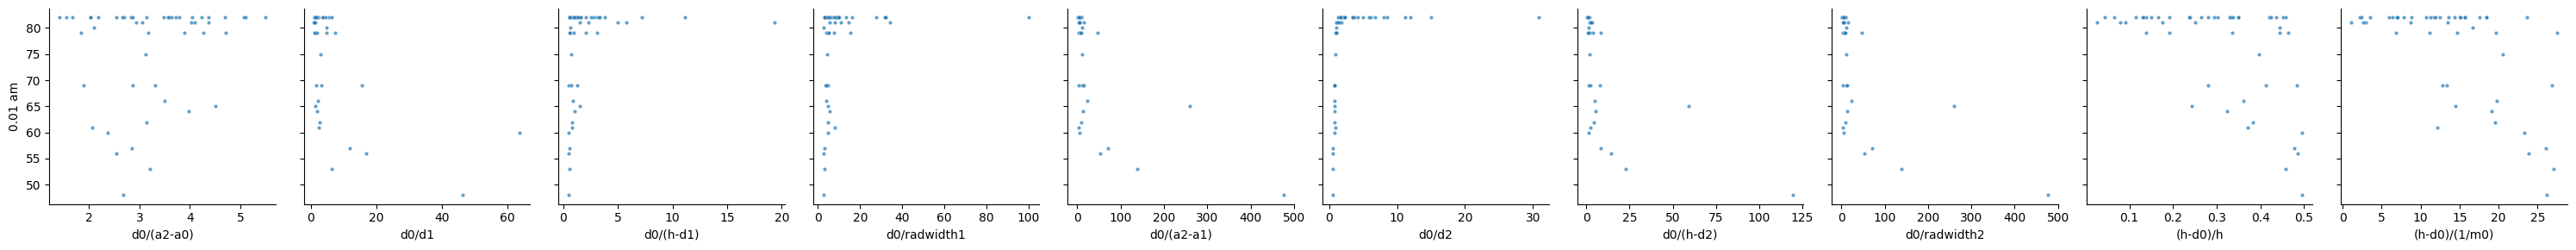

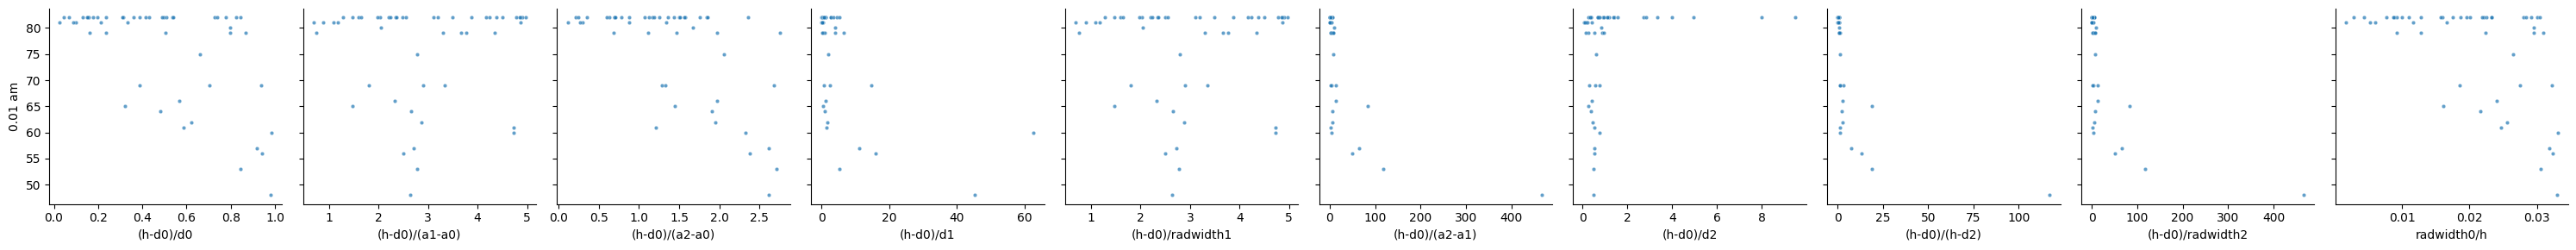

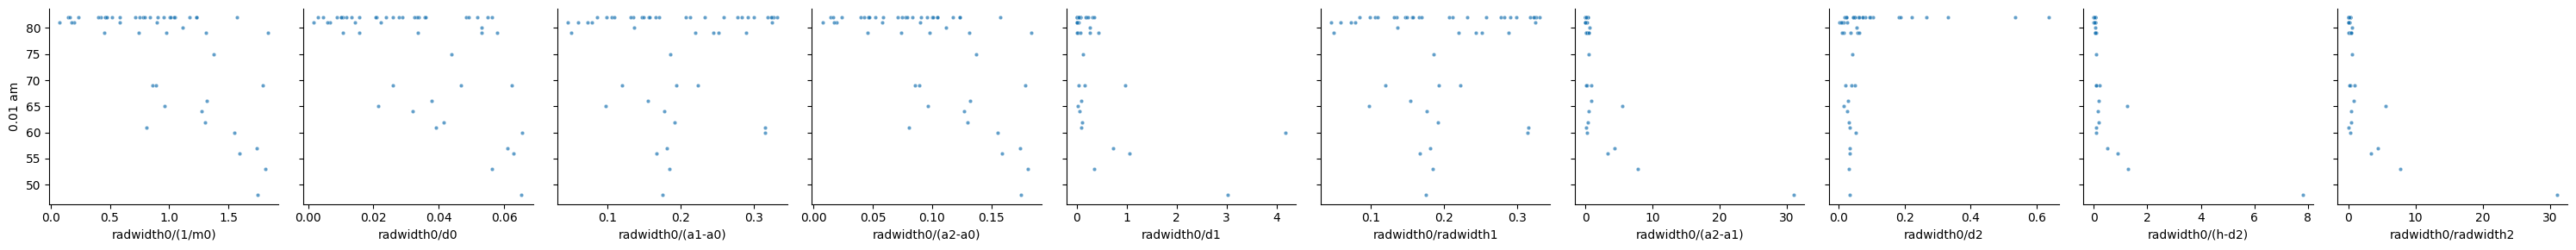

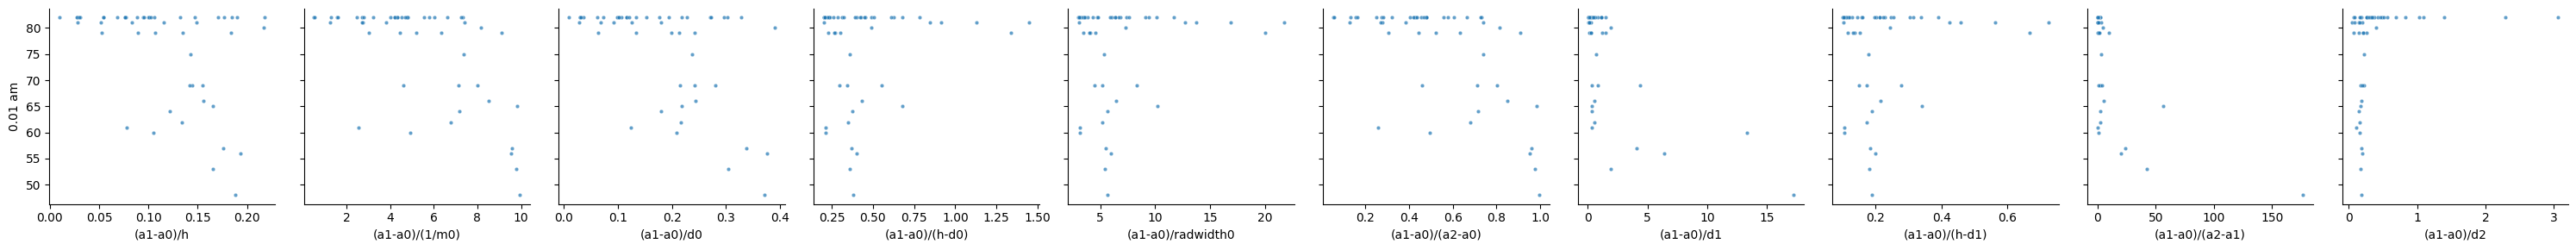

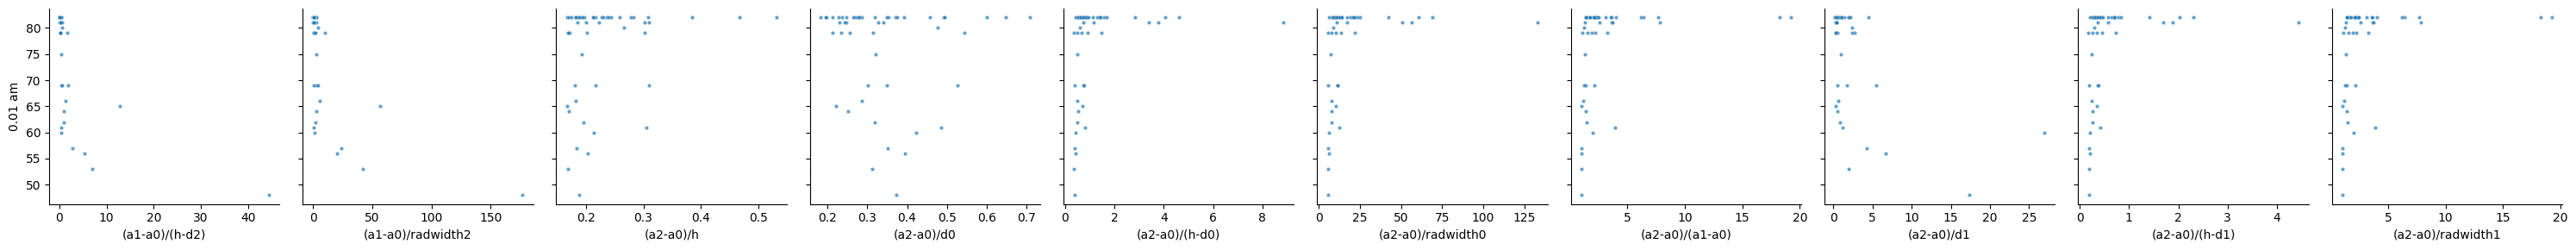

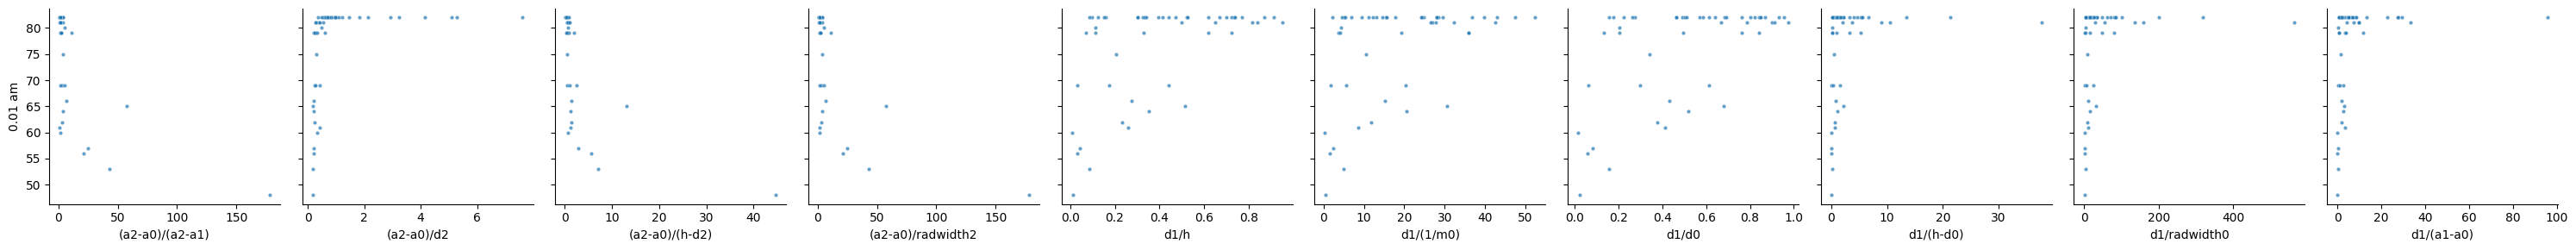

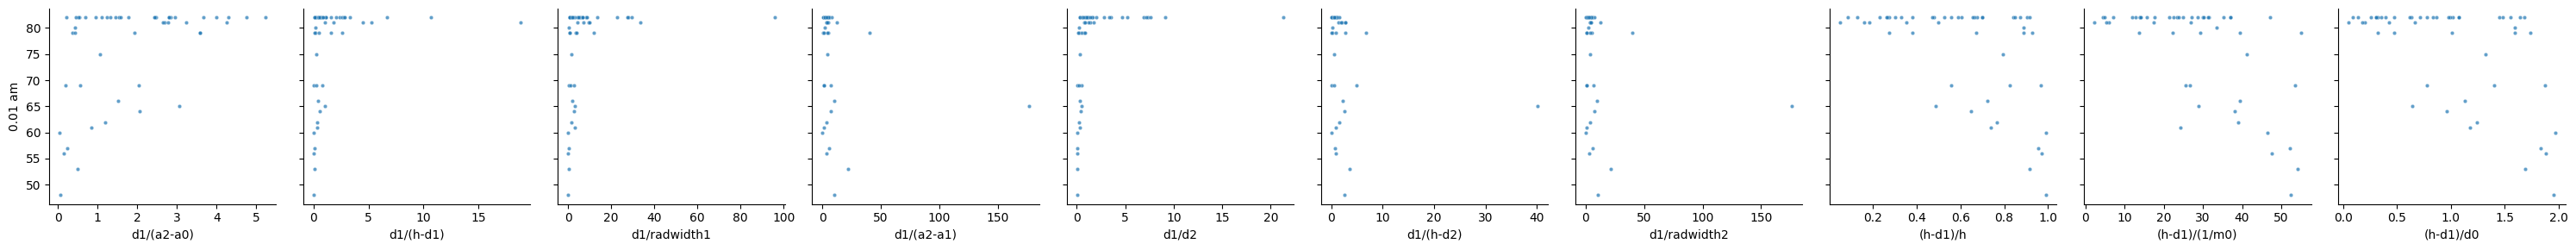

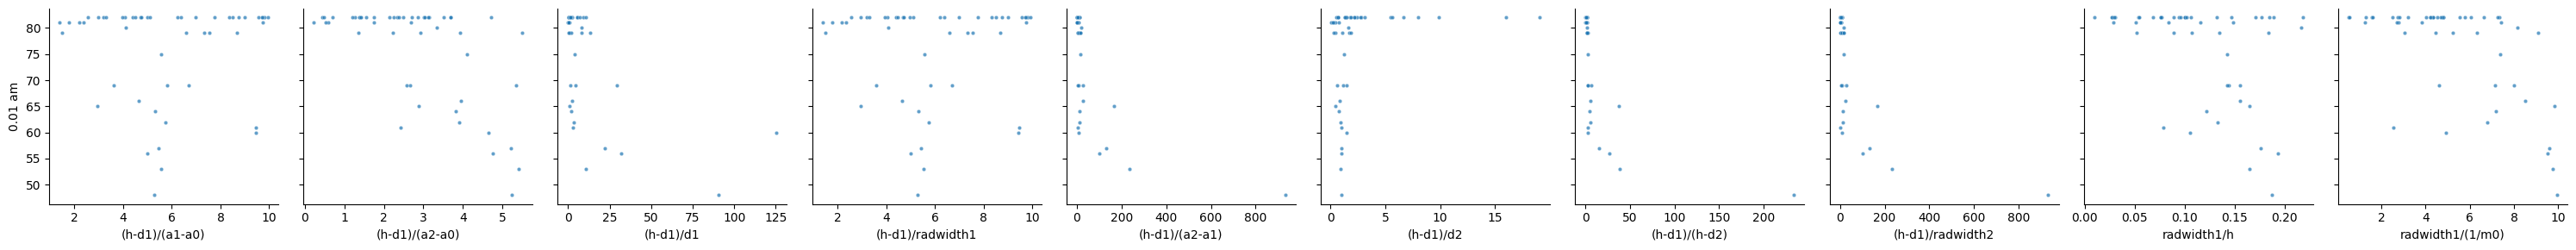

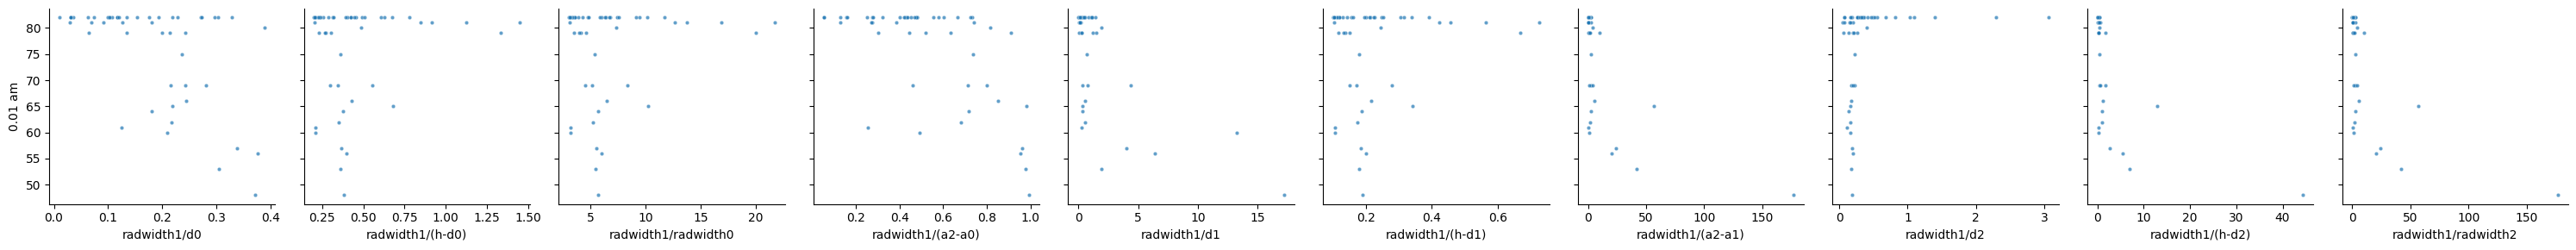

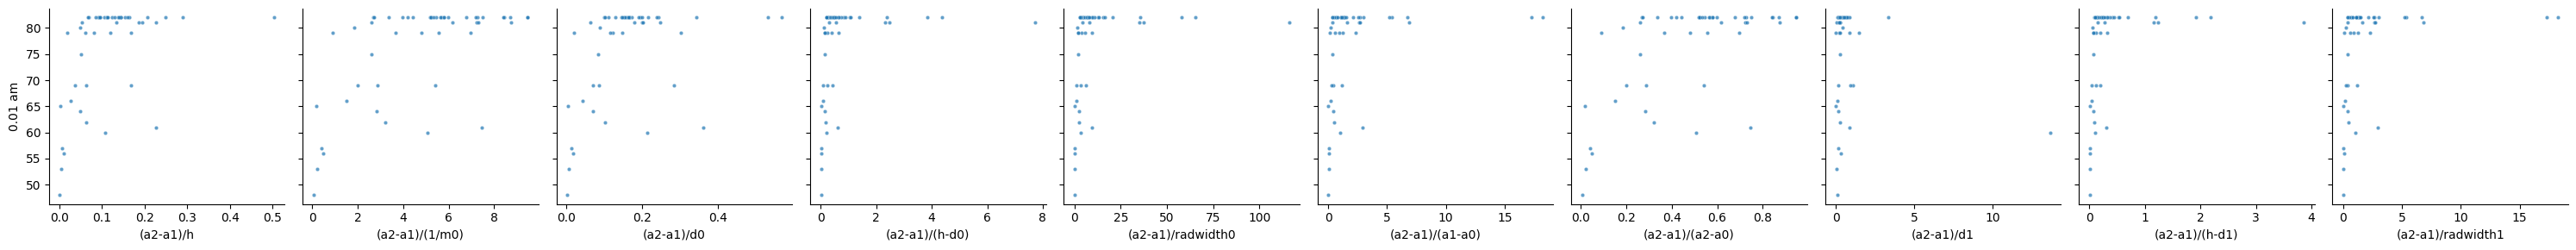

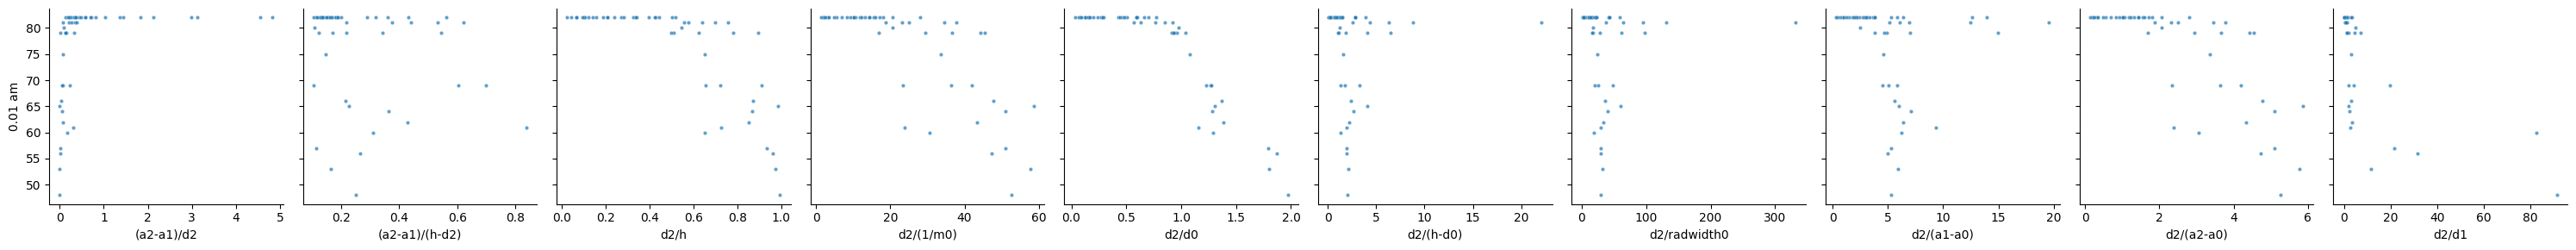

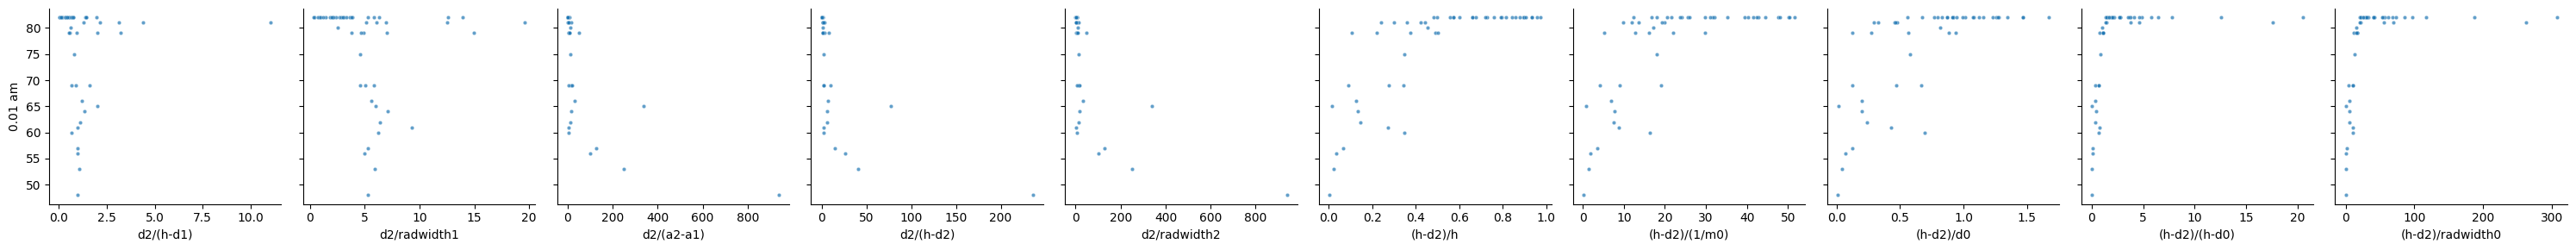

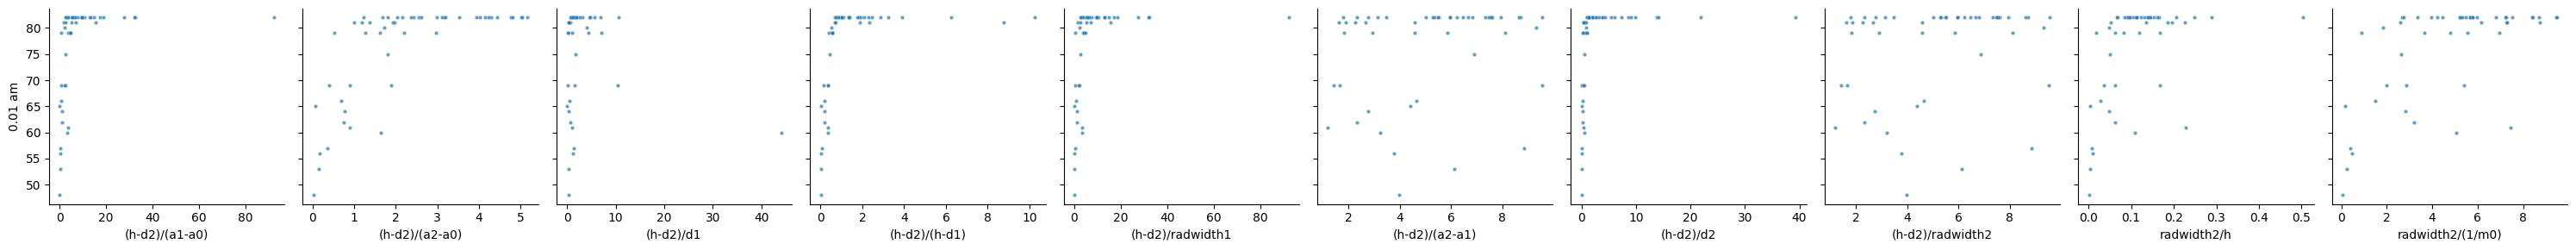

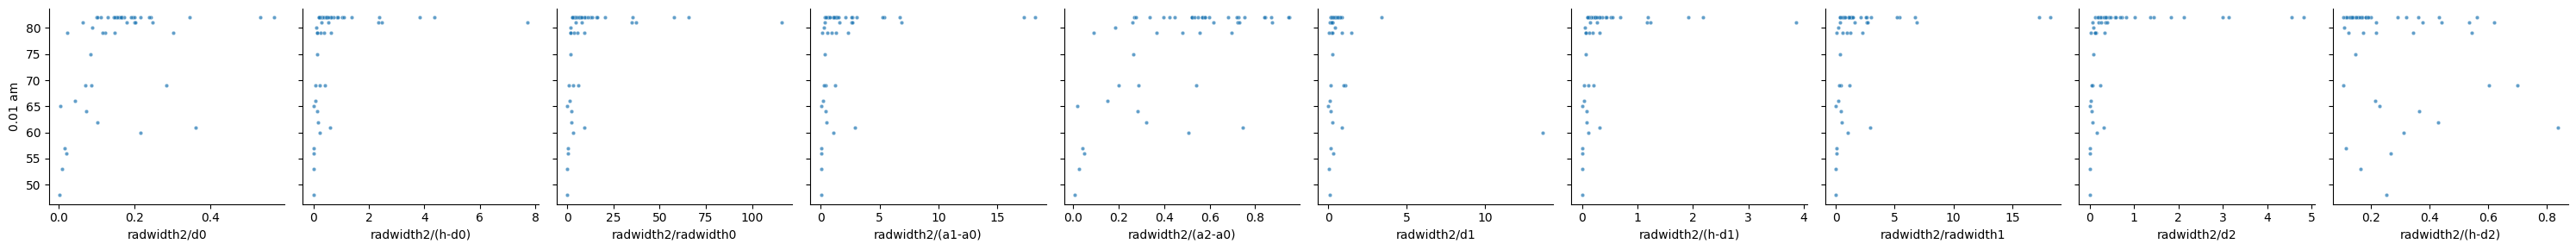

In [ ]:
# Plotting all the ratios to narrow down those with shape.
y_funcs = {"0.01 am" : (lambda data_dict, m0 : data_dict[m0]["convergence point 0.01 am"])}#,
           # "0.01 dp" : (lambda data_dict, m0 : data_dict[m0]["convergence point 0.01 dp"])}
count = 0
plot_fs = {}
for func_label in dim0s.keys():
  variable_vals = [dim0s[func_label](suspect, m0) for suspect in suspects for m0 in suspect["m0s"]]
  min_v, max_v = min(variable_vals), max(variable_vals)
  if abs(max_v-min_v)/max_v > 0.00001:
    plot_fs[func_label] = dim0s[func_label]
    count += 1
    if count == 10:
      plot_relation_grid(suspects, plot_fs, y_funcs)
      count, plot_fs = 0, {}
if count != 0:
  plot_relation_grid(suspects, plot_fs, y_funcs)

In [35]:
# data = many_data_dicts_to_convergence_plot_data(suspects)
# for func_label in dim0s.keys():
#   variable_vals = [dim0s[func_label](suspect, m0) for suspect in suspects for m0 in suspect["m0s"]]
#   min_v, max_v = min(variable_vals), max(variable_vals)
#   print(func_label, min_v, max_v)
#   if abs(max_v-min_v)/max_v > 0.00001:
#     colors = color_by_f_value(dim0s[func_label], suspects, cmap = 'pink')
#     variable_vals = [dim0s[func_label](suspect, m0) for suspect in suspects for m0 in suspect["m0s"]]
#     plot_set_convergence_and_log(data, "dp", error = 0.01, show_error=True, colors = colors, trunc = 0)
#   else: print("Constant Variable")

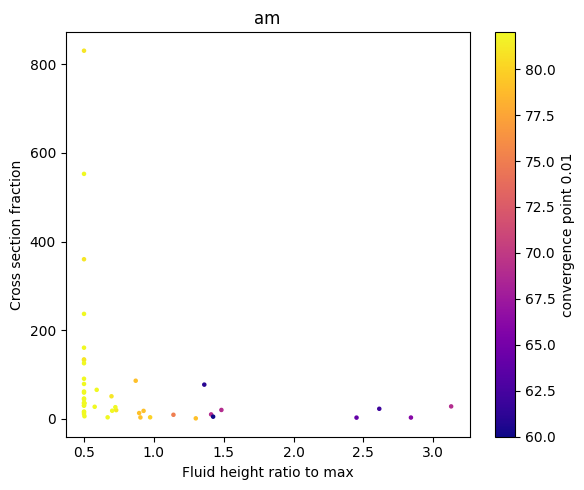

In [57]:
# plot_hydros_against_2(suspects, "am", 0.01,
#                       (lambda config, m0: (config["h"]-config["d"][0])/max(config["h"]-config["d"][1], config["h"]-config["d"][2])),
#                       (lambda config, m0: config["a"][0]/(config["a"][2] - config["a"][0])), "Fluid height ratio to max", "Cross section fraction")

subset = [suspect for suspect in suspects if f(suspect, suspect[suspect["m0s"][0]]) < 5]

plot_hydros_against_2(subset, "am", 0.01,
                      (lambda config, m0: (config["h"]-config["d"][0])/min(config["h"]-config["d"][1], config["h"]-config["d"][2])),
                      (lambda config, m0: (config["a"][2] - config["a"][1])), "Fluid height ratio to max", "Cross section fraction")

In [38]:
def plot_hydros_against_1(data, hydro, error, xfunc, xlabel = "X", ylabel = "Y", title = None):
  xs = [xfunc(config, m0) for config in data for m0 in config["m0s"]]
  ys = [config[m0][f"convergence point {error:2g} " + hydro] for config in data for m0 in config["m0s"]]
  plt.scatter(xs, ys)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

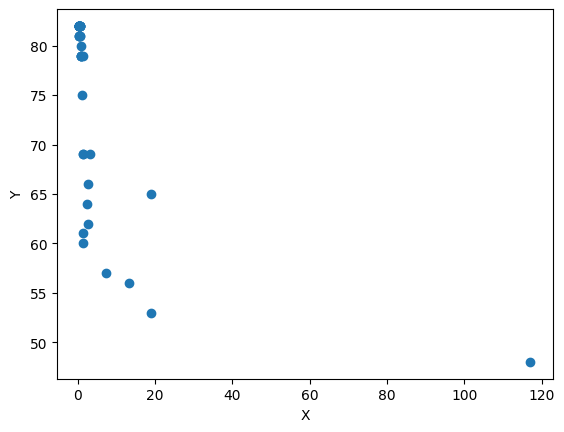

In [51]:
f = lambda config, m0: (config["h"]-config["d"][0])/min(config["h"]-config["d"][1], config["h"]-config["d"][2])
f1 = lambda config, m0: (config["h"]-config["d"][0])/(config["h"]-config["d"][1])
f2 = lambda config, m0: (config["h"]-config["d"][0])/(config["h"]-config["d"][2])
subset = [suspect for suspect in suspects if f(suspect, suspect[suspect["m0s"][0]]) <120]
plot_hydros_against_1(subset, "am", 0.01, f)

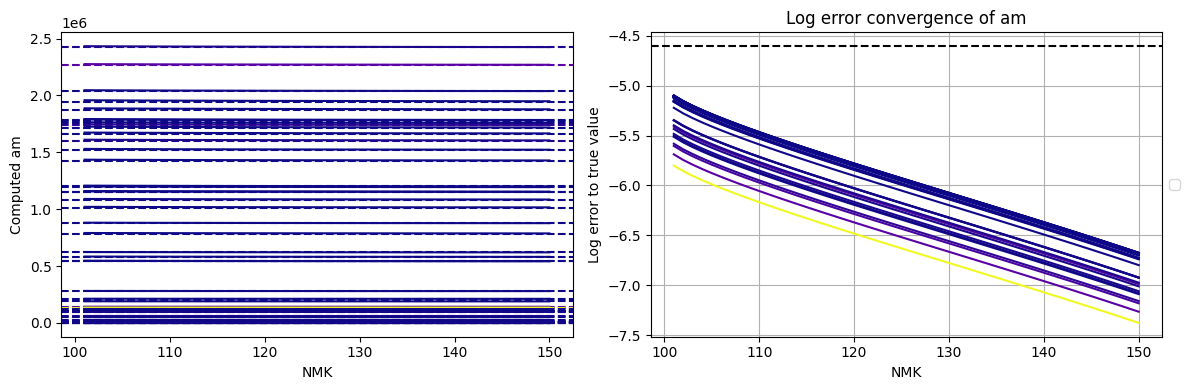

In [35]:
data = many_data_dicts_to_convergence_plot_data(suspects)
colors = color_by_f_value(lambda config, m0: (config["h"]-config["d"][0])/min(config["h"]-config["d"][1], config["h"]-config["d"][2]),
                  suspects, cmap = "plasma")
plot_set_convergence_and_log(data, "am", error = 0.01, show_error=True, colors = colors, trunc = 100, alpha = 0.1)

22.508254503199773 59.77244976037552


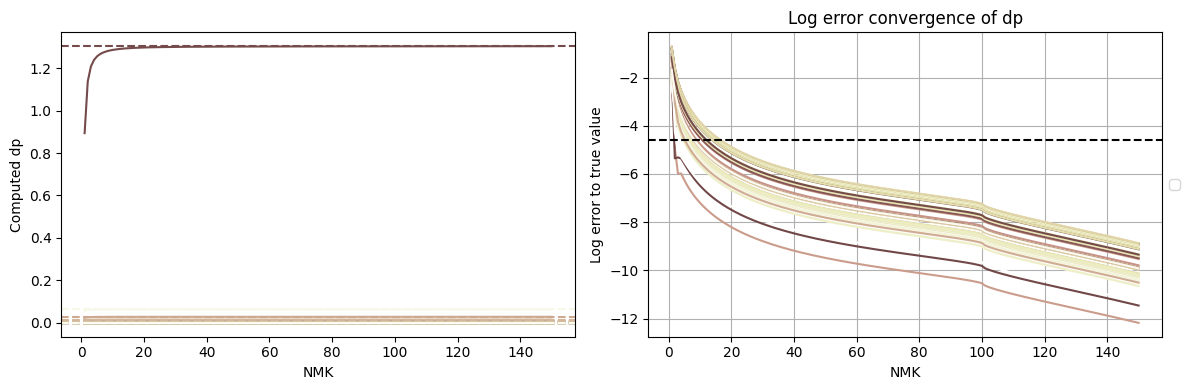

In [12]:
data = many_data_dicts_to_convergence_plot_data(suspects)
func_label = "m0h"
colors = color_by_f_value(variable_funcs[func_label], suspects, cmap = 'pink')
variable_vals = [variable_funcs[func_label](suspect, m0) for suspect in suspects for m0 in suspect["m0s"]]
print(min(variable_vals), max(variable_vals))
plot_set_convergence_and_log(data, "dp", error = 0.01, show_error=True, colors = colors, trunc = 0)

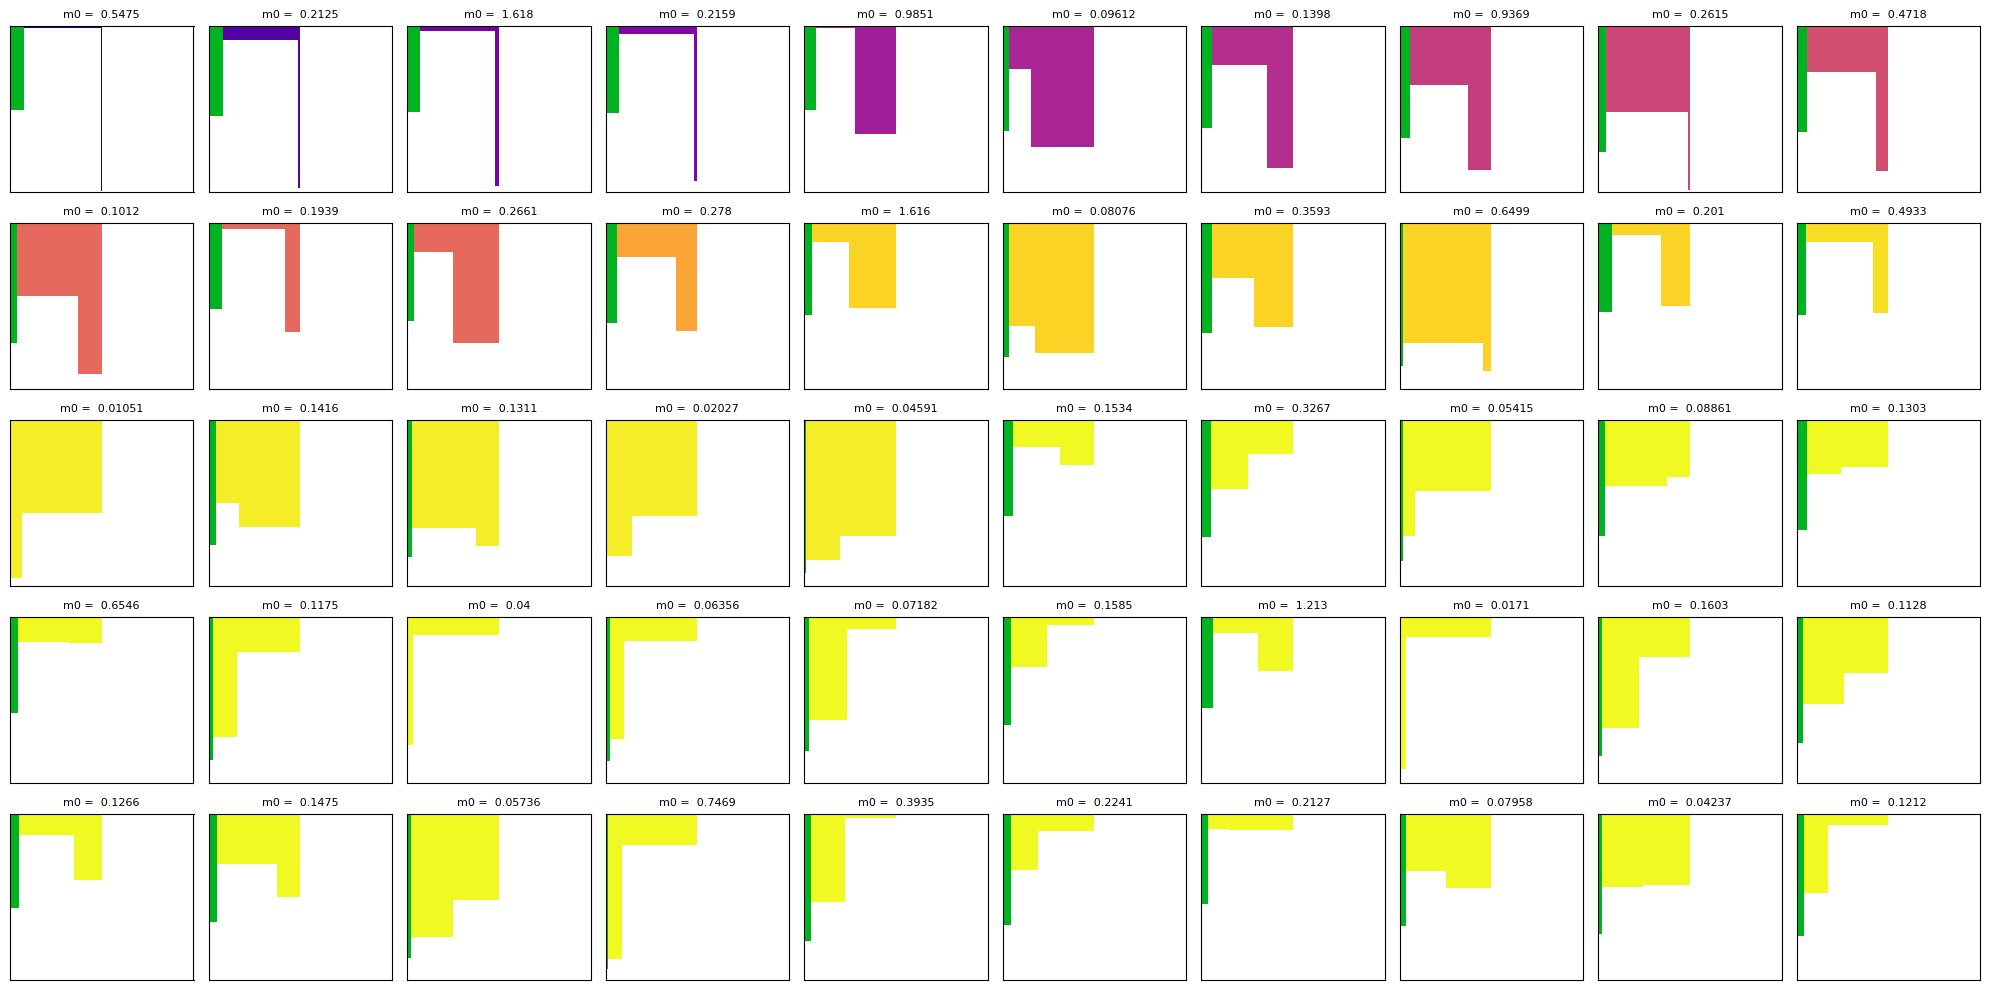

In [52]:
def plot_varied_cases(fixed_prob_lsts, idx, hydro, f = None, xlab = "X", error = 0.01):
  subset = fixed_prob_lsts[idx].copy()
  val_func = lambda data: data[data["m0s"][0]][f"convergence point {error:.2g} " + hydro]
  subset.sort(key = val_func)
  vals = [val_func(data) for data in subset]
  filter_and_plot_shapes(subset, lambda data_dict, m0 : True, 
                        lambda data_dict, m0 : get_plasma_color(data_dict[m0][f"convergence point {error:.2g} " + hydro], min_value = min(vals), max_value=max(vals)),
                        ppr = 10, figsize_per_plot = (2, 2))
  if f is not None:
    xs = [f(data_dict, data_dict["m0s"][0]) for data_dict in subset]
    ys = [data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in subset]
    plt.scatter(xs, ys)
    plt.xlabel(xlab)
    plt.ylabel("convergence point 0.01")
    plt.title(hydro)
    plt.show()

plot_varied_cases(all_hist_data, 7, "am")